In [1]:
import requests as rq
import lxml.html as lx
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
import math





## Obtain Kings Players Stats + Salary

In [2]:
#read html + make df for general stats
url = 'https://www.espn.com/nba/team/stats/_/name/sac/salary'
names = pd.read_html(url)[0]
stats = pd.read_html(url)[1]
kings_stats_temp = pd.concat([names,stats],axis = "columns")
kings_stats_temp

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO
0,De'Aaron Fox PG,21,21.0,31.7,23.1,0.5,4.6,5.1,5.8,1.1,0.5,2.6,2.5,2.2
1,Domantas Sabonis PF,22,22.0,32.0,16.7,2.2,8.8,11.0,6.5,0.7,0.5,2.5,3.8,2.6
2,Kevin Huerter SG,22,22.0,31.8,15.5,0.4,2.8,3.2,3.2,1.0,0.4,1.5,2.4,2.2
3,Malik Monk SG,22,0.0,22.3,14.7,0.4,1.7,2.1,4.3,0.7,0.2,1.9,1.8,2.3
4,Harrison Barnes SF,22,22.0,30.6,13.2,1.0,4.4,5.5,1.9,0.9,0.1,1.2,1.4,1.5
5,Keegan Murray SF,20,18.0,28.4,11.3,0.9,3.2,4.1,0.9,0.8,0.6,1.6,2.1,0.6
6,Terence Davis SG,20,1.0,13.2,7.0,0.5,2.6,3.0,1.5,0.8,0.2,0.8,1.8,2.0
7,Davion Mitchell PG,22,1.0,19.2,6.7,0.1,1.3,1.4,2.3,0.5,0.2,1.0,1.6,2.2
8,Trey Lyles PF,17,0.0,14.2,6.3,1.0,1.8,2.8,0.8,0.4,0.4,1.0,1.2,0.8
9,Chimezie Metu PF,18,0.0,12.6,5.9,0.7,2.8,3.5,0.8,0.3,0.3,0.7,1.2,1.2


In [3]:
def remove_positions(df):
    '''Removes The position indicator after each player's name (i.e. PG, PF, SG), also drops the "Total" row as it's not needed.'''
    words = []
    for i in df["Name"]:
        words.append(i.split()[0:2])
    words = pd.DataFrame(words)
    words.columns = ["First","Last"]
    words["Names"] = words['First']+" "+ words["Last"]
    words = words.drop("First", axis = 1).drop("Last", axis = 1)
    df["Name"] = words
    #df = df.drop(16)
    df = df.dropna().reset_index().drop("index", axis = "columns")
    return df

kings_stats = remove_positions(kings_stats_temp)
kings_stats

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO
0,De'Aaron Fox,21,21.0,31.7,23.1,0.5,4.6,5.1,5.8,1.1,0.5,2.6,2.5,2.2
1,Domantas Sabonis,22,22.0,32.0,16.7,2.2,8.8,11.0,6.5,0.7,0.5,2.5,3.8,2.6
2,Kevin Huerter,22,22.0,31.8,15.5,0.4,2.8,3.2,3.2,1.0,0.4,1.5,2.4,2.2
3,Malik Monk,22,0.0,22.3,14.7,0.4,1.7,2.1,4.3,0.7,0.2,1.9,1.8,2.3
4,Harrison Barnes,22,22.0,30.6,13.2,1.0,4.4,5.5,1.9,0.9,0.1,1.2,1.4,1.5
5,Keegan Murray,20,18.0,28.4,11.3,0.9,3.2,4.1,0.9,0.8,0.6,1.6,2.1,0.6
6,Terence Davis,20,1.0,13.2,7.0,0.5,2.6,3.0,1.5,0.8,0.2,0.8,1.8,2.0
7,Davion Mitchell,22,1.0,19.2,6.7,0.1,1.3,1.4,2.3,0.5,0.2,1.0,1.6,2.2
8,Trey Lyles,17,0.0,14.2,6.3,1.0,1.8,2.8,0.8,0.4,0.4,1.0,1.2,0.8
9,Chimezie Metu,18,0.0,12.6,5.9,0.7,2.8,3.5,0.8,0.3,0.3,0.7,1.2,1.2


In [4]:
# read html + make df for shooting stats
shoot = pd.read_html(url)[3]
kings_shoot_stats_temp = pd.concat([names,shoot], axis = "columns")

In [5]:
kings_shoot_stats = remove_positions(kings_shoot_stats_temp)
kings_shoot_stats

,Name,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF
0,De'Aaron Fox,8.6,16.6,51.6,1.9,5.0,38.1,4.1,5.0,81.9,6.7,11.6,57.4,1.393,0.57
1,Domantas Sabonis,6.0,10.1,59.9,0.5,1.2,37.0,4.2,5.5,75.4,5.6,8.9,63.1,1.658,0.62
2,Kevin Huerter,5.5,11.5,47.4,3.0,7.1,42.3,1.6,2.4,69.2,2.5,4.4,55.7,1.352,0.60
3,Malik Monk,5.4,11.0,48.8,2.1,5.7,36.8,1.9,2.1,89.4,3.3,5.3,61.5,1.339,0.58
4,Harrison Barnes,4.1,8.4,48.9,1.0,3.3,30.1,4.0,4.8,84.0,3.1,5.0,61.3,1.582,0.55
5,Keegan Murray,4.1,9.9,41.4,1.9,5.7,33.3,1.2,1.4,85.2,2.2,4.2,52.4,1.136,0.51
6,Terence Davis,2.5,5.6,43.8,1.4,3.6,39.4,0.7,0.8,87.5,1.1,2.1,51.2,1.250,0.56
7,Davion Mitchell,2.7,6.0,44.7,0.8,2.7,30.5,0.5,0.7,73.3,1.9,3.3,56.2,1.114,0.52
8,Trey Lyles,2.1,5.1,40.7,1.2,3.6,34.4,0.9,1.3,72.7,0.8,1.5,56.0,1.244,0.53
9,Chimezie Metu,2.5,4.0,62.5,0.2,0.9,18.8,0.8,0.9,87.5,2.3,3.1,75.0,1.486,0.65


In [6]:
#create salary df
url2 = "https://www.espn.com/nba/team/roster/_/name/sac/salary"
kings_salary_raw = pd.read_html(url2)[0]

In [7]:
#Strips player number from each players name
for i in range(0,len(kings_salary_raw)):
    kings_salary_raw["Name"][i] = re.sub(r"\d+", "", str(kings_salary_raw["Name"][i]))

/tmp/ipykernel_1012/1132565592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kings_salary_raw["Name"][i] = re.sub(r"\d+", "", str(kings_salary_raw["Name"][i]))


In [8]:
#Cleans dataframe to only player name + salary
kings_salary = kings_salary_raw.set_index("Name").drop('Unnamed: 0', axis = 1)
kings_salary.columns
kings_salary = kings_salary.drop(['POS', 'Age', 'HT', 'WT', 'College'], axis = 1)
kings_salary

,Salary
Name,
Keon Ellis,--
Neemias Queta,--
Chima Moneke,"$1,017,781"
KZ Okpala,"$1,782,621"
Matthew Dellavedova,"$1,836,090"
Chimezie Metu,"$1,910,680"
Trey Lyles,"$2,700,000"
Alex Len,"$3,918,000"
Terence Davis,"$4,000,000"


In [9]:
#combine player stats df and salary df as kings_stats_salary. 
pd.set_option('display.max_columns', None)
kings_stats_salary = kings_stats.join(kings_salary, on = "Name")
kings_stats_salary

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,Salary
0,De'Aaron Fox,21,21.0,31.7,23.1,0.5,4.6,5.1,5.8,1.1,0.5,2.6,2.5,2.2,"$28,103,550"
1,Domantas Sabonis,22,22.0,32.0,16.7,2.2,8.8,11.0,6.5,0.7,0.5,2.5,3.8,2.6,"$18,500,000"
2,Kevin Huerter,22,22.0,31.8,15.5,0.4,2.8,3.2,3.2,1.0,0.4,1.5,2.4,2.2,"$14,508,929"
3,Malik Monk,22,0.0,22.3,14.7,0.4,1.7,2.1,4.3,0.7,0.2,1.9,1.8,2.3,"$9,472,219"
4,Harrison Barnes,22,22.0,30.6,13.2,1.0,4.4,5.5,1.9,0.9,0.1,1.2,1.4,1.5,"$18,352,273"
5,Keegan Murray,20,18.0,28.4,11.3,0.9,3.2,4.1,0.9,0.8,0.6,1.6,2.1,0.6,"$8,008,440"
6,Terence Davis,20,1.0,13.2,7.0,0.5,2.6,3.0,1.5,0.8,0.2,0.8,1.8,2.0,"$4,000,000"
7,Davion Mitchell,22,1.0,19.2,6.7,0.1,1.3,1.4,2.3,0.5,0.2,1.0,1.6,2.2,"$4,833,600"
8,Trey Lyles,17,0.0,14.2,6.3,1.0,1.8,2.8,0.8,0.4,0.4,1.0,1.2,0.8,"$2,700,000"
9,Chimezie Metu,18,0.0,12.6,5.9,0.7,2.8,3.5,0.8,0.3,0.3,0.7,1.2,1.2,"$1,910,680"


In [10]:
#combine kings shooting stats df with "kings_stats_salary".
kings_player_shooting_salary = pd.merge(kings_stats_salary,kings_shoot_stats, how = "left", on = "Name")
kings_player_shooting_salary

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,Salary,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF
0,De'Aaron Fox,21,21.0,31.7,23.1,0.5,4.6,5.1,5.8,1.1,0.5,2.6,2.5,2.2,"$28,103,550",8.6,16.6,51.6,1.9,5.0,38.1,4.1,5.0,81.9,6.7,11.6,57.4,1.393,0.57
1,Domantas Sabonis,22,22.0,32.0,16.7,2.2,8.8,11.0,6.5,0.7,0.5,2.5,3.8,2.6,"$18,500,000",6.0,10.1,59.9,0.5,1.2,37.0,4.2,5.5,75.4,5.6,8.9,63.1,1.658,0.62
2,Kevin Huerter,22,22.0,31.8,15.5,0.4,2.8,3.2,3.2,1.0,0.4,1.5,2.4,2.2,"$14,508,929",5.5,11.5,47.4,3.0,7.1,42.3,1.6,2.4,69.2,2.5,4.4,55.7,1.352,0.60
3,Malik Monk,22,0.0,22.3,14.7,0.4,1.7,2.1,4.3,0.7,0.2,1.9,1.8,2.3,"$9,472,219",5.4,11.0,48.8,2.1,5.7,36.8,1.9,2.1,89.4,3.3,5.3,61.5,1.339,0.58
4,Harrison Barnes,22,22.0,30.6,13.2,1.0,4.4,5.5,1.9,0.9,0.1,1.2,1.4,1.5,"$18,352,273",4.1,8.4,48.9,1.0,3.3,30.1,4.0,4.8,84.0,3.1,5.0,61.3,1.582,0.55
5,Keegan Murray,20,18.0,28.4,11.3,0.9,3.2,4.1,0.9,0.8,0.6,1.6,2.1,0.6,"$8,008,440",4.1,9.9,41.4,1.9,5.7,33.3,1.2,1.4,85.2,2.2,4.2,52.4,1.136,0.51
6,Terence Davis,20,1.0,13.2,7.0,0.5,2.6,3.0,1.5,0.8,0.2,0.8,1.8,2.0,"$4,000,000",2.5,5.6,43.8,1.4,3.6,39.4,0.7,0.8,87.5,1.1,2.1,51.2,1.250,0.56
7,Davion Mitchell,22,1.0,19.2,6.7,0.1,1.3,1.4,2.3,0.5,0.2,1.0,1.6,2.2,"$4,833,600",2.7,6.0,44.7,0.8,2.7,30.5,0.5,0.7,73.3,1.9,3.3,56.2,1.114,0.52
8,Trey Lyles,17,0.0,14.2,6.3,1.0,1.8,2.8,0.8,0.4,0.4,1.0,1.2,0.8,"$2,700,000",2.1,5.1,40.7,1.2,3.6,34.4,0.9,1.3,72.7,0.8,1.5,56.0,1.244,0.53
9,Chimezie Metu,18,0.0,12.6,5.9,0.7,2.8,3.5,0.8,0.3,0.3,0.7,1.2,1.2,"$1,910,680",2.5,4.0,62.5,0.2,0.9,18.8,0.8,0.9,87.5,2.3,3.1,75.0,1.486,0.65


In [11]:
#Rearrange salary to column to go at the end.
salary = kings_player_shooting_salary.pop("Salary")
kings_final_df = pd.concat([kings_player_shooting_salary, salary], axis = 'columns')
kings_final_df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,De'Aaron Fox,21,21.0,31.7,23.1,0.5,4.6,5.1,5.8,1.1,0.5,2.6,2.5,2.2,8.6,16.6,51.6,1.9,5.0,38.1,4.1,5.0,81.9,6.7,11.6,57.4,1.393,0.57,"$28,103,550"
1,Domantas Sabonis,22,22.0,32.0,16.7,2.2,8.8,11.0,6.5,0.7,0.5,2.5,3.8,2.6,6.0,10.1,59.9,0.5,1.2,37.0,4.2,5.5,75.4,5.6,8.9,63.1,1.658,0.62,"$18,500,000"
2,Kevin Huerter,22,22.0,31.8,15.5,0.4,2.8,3.2,3.2,1.0,0.4,1.5,2.4,2.2,5.5,11.5,47.4,3.0,7.1,42.3,1.6,2.4,69.2,2.5,4.4,55.7,1.352,0.60,"$14,508,929"
3,Malik Monk,22,0.0,22.3,14.7,0.4,1.7,2.1,4.3,0.7,0.2,1.9,1.8,2.3,5.4,11.0,48.8,2.1,5.7,36.8,1.9,2.1,89.4,3.3,5.3,61.5,1.339,0.58,"$9,472,219"
4,Harrison Barnes,22,22.0,30.6,13.2,1.0,4.4,5.5,1.9,0.9,0.1,1.2,1.4,1.5,4.1,8.4,48.9,1.0,3.3,30.1,4.0,4.8,84.0,3.1,5.0,61.3,1.582,0.55,"$18,352,273"
5,Keegan Murray,20,18.0,28.4,11.3,0.9,3.2,4.1,0.9,0.8,0.6,1.6,2.1,0.6,4.1,9.9,41.4,1.9,5.7,33.3,1.2,1.4,85.2,2.2,4.2,52.4,1.136,0.51,"$8,008,440"
6,Terence Davis,20,1.0,13.2,7.0,0.5,2.6,3.0,1.5,0.8,0.2,0.8,1.8,2.0,2.5,5.6,43.8,1.4,3.6,39.4,0.7,0.8,87.5,1.1,2.1,51.2,1.250,0.56,"$4,000,000"
7,Davion Mitchell,22,1.0,19.2,6.7,0.1,1.3,1.4,2.3,0.5,0.2,1.0,1.6,2.2,2.7,6.0,44.7,0.8,2.7,30.5,0.5,0.7,73.3,1.9,3.3,56.2,1.114,0.52,"$4,833,600"
8,Trey Lyles,17,0.0,14.2,6.3,1.0,1.8,2.8,0.8,0.4,0.4,1.0,1.2,0.8,2.1,5.1,40.7,1.2,3.6,34.4,0.9,1.3,72.7,0.8,1.5,56.0,1.244,0.53,"$2,700,000"
9,Chimezie Metu,18,0.0,12.6,5.9,0.7,2.8,3.5,0.8,0.3,0.3,0.7,1.2,1.2,2.5,4.0,62.5,0.2,0.9,18.8,0.8,0.9,87.5,2.3,3.1,75.0,1.486,0.65,"$1,910,680"


#combine shooting stats df and salary df. 
kings_stats_salary = kings_shoot_stats.join(kings_salary, on = "Name")
kings_stats_salary

#Merging salary into player and shooting stats dataframe, then moving the "salary" column to the end.
pd.set_option('display.max_columns', None)
kings_player_shooting_salary = pd.merge(kings_stats_salary,kings_stats, how = "left", on = "Name")
salary = kings_player_shooting_salary.pop("Salary")
kings_final_df = pd.concat([kings_player_shooting_salary, salary], axis = 'columns')



kings_final_df

## Obtain NBA Team Stats

In [12]:
nbateamstats = pd.DataFrame()
for i in range(2023,2018, -1):
    tempurl = "https://www.espn.com/nba/stats/team/_/view/opponent/season/"+str(i)+"/seasontype/2"
    team_names = pd.read_html(tempurl)[0]
    team_stats = pd.read_html(tempurl)[1]
    team_stats
    team_concat = pd.concat([team_names,team_stats],axis = "columns")
    team_concat['Team'] = str(i) + " " + team_concat['Team'].astype(str)
    nbateamstats = pd.concat([nbateamstats, team_concat], ignore_index = True)
nbateamstats

,RK,Team,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF
0,1,2023 Cleveland Cavaliers,24,105.0,38.4,84.4,45.5,11.2,31.6,35.4,17.1,22.4,76.3,9.2,30.7,39.9,22.8,7.8,4.5,14.5,22.1
1,2,2023 Philadelphia 76ers,24,107.6,39.5,84.3,46.9,10.6,32.3,32.8,18.0,23.4,76.7,9.9,33.0,43.0,23.8,6.9,5.1,14.9,19.4
2,3,2023 Milwaukee Bucks,23,107.8,40.0,90.0,44.5,11.0,31.6,34.8,16.8,21.4,78.5,10.3,33.3,43.6,21.3,6.5,4.8,12.7,20.0
3,4,2023 Dallas Mavericks,23,108.4,39.6,82.9,47.8,11.0,30.3,36.4,18.2,23.3,78.2,9.7,33.3,42.9,23.4,6.5,4.5,14.9,22.7
4,5,2023 LA Clippers,25,108.8,40.5,89.2,45.4,12.2,35.5,34.4,15.6,21.0,74.1,10.8,32.6,43.4,24.2,8.4,4.5,12.7,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26,2019 Sacramento Kings,82,115.3,42.3,90.6,46.6,12.0,34.6,34.8,18.8,24.4,77.0,11.2,36.8,48.0,24.7,7.5,5.1,15.3,21.4
146,27,2019 New Orleans Pelicans,82,116.8,43.3,92.8,46.6,12.3,33.7,36.4,17.9,23.5,76.4,11.0,34.8,45.8,26.5,8.6,5.4,13.1,21.0
147,28,2019 Phoenix Suns,82,116.8,42.5,88.2,48.2,11.1,29.9,37.2,20.8,27.6,75.3,11.8,35.3,47.2,25.9,9.0,5.0,15.2,20.7
148,29,2019 Washington Wizards,82,116.9,43.4,90.5,48.0,12.1,32.8,37.0,18.0,23.1,77.8,11.4,35.8,47.3,26.2,7.7,4.6,15.0,21.2


In [13]:
nbateams = pd.read_html("https://www.espn.com/nba/stats/team/_/view/opponent/season/2023/seasontype/2")[0]["Team"]
nbateams

0        Cleveland Cavaliers
1         Philadelphia 76ers
2            Milwaukee Bucks
3           Dallas Mavericks
4                LA Clippers
5               Phoenix Suns
6            Toronto Raptors
7                 Miami Heat
8              Brooklyn Nets
9       New Orleans Pelicans
10    Portland Trail Blazers
11        Washington Wizards
12            Boston Celtics
13         Memphis Grizzlies
14             Chicago Bulls
15            Denver Nuggets
16             Atlanta Hawks
17             Orlando Magic
18           New York Knicks
19         Charlotte Hornets
20        Los Angeles Lakers
21          Sacramento Kings
22                 Utah Jazz
23            Indiana Pacers
24     Golden State Warriors
25    Minnesota Timberwolves
26           Houston Rockets
27     Oklahoma City Thunder
28           Detroit Pistons
29         San Antonio Spurs
Name: Team, dtype: object

In [14]:
def clean_teams(team, stats):
    #Function fixes errors caused by read_html function. Makes the "row header" back into the first row
    team1 = team.columns[0] 
    team.columns = ["Team"]
    new_row = pd.DataFrame({team.columns[0]:team1}, index=[0])
    team = pd.concat([new_row,team.loc[:]]).reset_index(drop=True)
    #Standardizes NBA team names across dataframes to allow easy joining between them
    for i in range(0, len(team.iloc[:,0])):
        for teamname in nbateams:
            if team.iloc[:,0][i].__contains__(teamname):
                team.iloc[:,0][i] = teamname
                break
            else:
                continue
    result = team.join(stats.iloc[:,0:2])
    return(result)
    
def add_playoff_status(df, year):
    #df input: conference standings (15 teams) ranked in order by wins
    #creates new variable that shows if a certain team made the playoffs 
    #2023 is the current season and the playoffs have not happened yet, therefore NaN
    if year == 2023:
        df["Made Playoffs"] = math.nan
        return(df)
    df["Made Playoffs"] = int(0)
    #2019-20 top 8 teams per conference made playoffs
    if year in [2019, 2020]:
        for index in df.index:
            if index < 8:
                df.iloc[index,3] = int(1)
    #2021-22 top 10 teams per conference made playoffs
    else:
        for index in df.index:
            if index < 10:
                df.iloc[index,3] = int(1)
    return(df)


league_wins_losses = pd.DataFrame()
for i in range(2023,2018, -1):
    urlstandings = "https://www.espn.com/nba/standings/_/season/"+ str(i)
    teams_east = pd.read_html(urlstandings)[0]
    stats_east = pd.read_html(urlstandings)[1]
    teams_west = pd.read_html(urlstandings)[2]
    stats_west = pd.read_html(urlstandings)[3]
    teams_east = clean_teams(teams_east, stats_east)
    teams_east = add_playoff_status(teams_east, i)
    teams_west = clean_teams(teams_west, stats_west)
    teams_west = add_playoff_status(teams_west, i)
    df_win_loss = pd.concat([teams_east, teams_west], ignore_index = True)
    df_win_loss['Team'] = str(i) + " " + df_win_loss['Team'].astype(str)
    league_wins_losses = pd.concat([league_wins_losses, df_win_loss], ignore_index = True)
league_wins_losses
    

,Team,W,L,Made Playoffs
0,2023 Boston Celtics,20,5,NaN
1,2023 Milwaukee Bucks,17,6,NaN
2,2023 Cleveland Cavaliers,15,9,NaN
3,2023 Atlanta Hawks,13,11,NaN
4,2023 Indiana Pacers,13,11,NaN
...,...,...,...,...
145,2019 Minnesota Timberwolves,36,46,0.0
146,2019 Memphis Grizzlies,33,49,0.0
147,2019 New Orleans Pelicans,33,49,0.0
148,2019 Dallas Mavericks,33,49,0.0


In [15]:
league_wins_losses.dtypes

Team              object
W                  int64
L                  int64
Made Playoffs    float64
dtype: object

In [16]:
fullnbastats = pd.merge(league_wins_losses, nbateamstats, on="Team")
fullnbastats = fullnbastats.drop(['RK'], axis=1)
fullnbastats

,Team,W,L,Made Playoffs,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF
0,2023 Boston Celtics,20,5,NaN,25,112.6,42.1,89.8,46.9,11.3,32.0,35.4,17.1,21.8,78.2,10.1,33.2,43.4,22.0,6.3,3.8,12.5,20.4
1,2023 Milwaukee Bucks,17,6,NaN,23,107.8,40.0,90.0,44.5,11.0,31.6,34.8,16.8,21.4,78.5,10.3,33.3,43.6,21.3,6.5,4.8,12.7,20.0
2,2023 Cleveland Cavaliers,15,9,NaN,24,105.0,38.4,84.4,45.5,11.2,31.6,35.4,17.1,22.4,76.3,9.2,30.7,39.9,22.8,7.8,4.5,14.5,22.1
3,2023 Atlanta Hawks,13,11,NaN,24,113.6,41.3,88.4,46.7,10.6,32.1,33.1,20.3,25.4,80.0,11.0,34.3,45.3,24.1,7.0,5.0,14.7,21.0
4,2023 Indiana Pacers,13,11,NaN,24,115.9,41.0,87.9,46.7,12.8,34.9,36.8,21.0,25.8,81.3,11.0,34.3,45.3,25.8,7.7,5.5,15.6,20.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2019 Minnesota Timberwolves,36,46,0.0,82,114.0,42.1,90.1,46.7,12.7,33.6,37.8,17.1,22.3,76.7,11.2,34.4,45.6,26.2,6.6,5.5,14.3,21.9
146,2019 Memphis Grizzlies,33,49,0.0,82,106.1,37.6,83.4,45.1,11.6,32.2,36.0,19.3,24.7,78.4,9.5,35.2,44.7,23.4,7.6,4.9,14.5,21.4
147,2019 New Orleans Pelicans,33,49,0.0,82,116.8,43.3,92.8,46.6,12.3,33.7,36.4,17.9,23.5,76.4,11.0,34.8,45.8,26.5,8.6,5.4,13.1,21.0
148,2019 Dallas Mavericks,33,49,0.0,82,110.1,40.9,89.2,45.9,11.2,32.5,34.4,17.1,22.0,77.7,10.2,34.6,44.8,24.5,7.8,4.5,12.5,23.2


In [17]:
nbaefficiencystats = pd.DataFrame()
for year in range(2023,2018, -1):
    efficiencyurl = "http://www.espn.com/nba/hollinger/teamstats/_/sort/defensiveEff/year/"+ str(year)
    efficiencystats = pd.read_html(efficiencyurl)[0].iloc[1: , 1:]
    efficiencystats = pd.DataFrame(efficiencystats.values[1:], columns=efficiencystats.iloc[0])
    for i in range(0, len(efficiencystats.iloc[:,0])):
        for teamname in nbateams:
            if efficiencystats.iloc[:,0][i] == "LA Lakers":
                efficiencystats.iloc[:,0][i] = "Los Angeles Lakers"
                break
            if efficiencystats.iloc[:,0][i] in teamname:
                efficiencystats.iloc[:,0][i] = teamname
                break
            else:
                continue
    efficiencystats = efficiencystats.rename(columns = {"TEAM": "Team"})
    efficiencystats['Team'] = str(year) + " " + efficiencystats['Team'].astype(str)
    efficiencystats = efficiencystats[["Team", "PACE", "EFF FG%", "OFF EFF", "DEF EFF"]]
    nbaefficiencystats = pd.concat([nbaefficiencystats, efficiencystats], ignore_index = True)
nbaefficiencystats

1,Team,PACE,EFF FG%,OFF EFF,DEF EFF
0,2023 Cleveland Cavaliers,98.1,54.6,111.0,104.8
1,2023 Milwaukee Bucks,101.9,53.3,108.8,105.6
2,2023 New Orleans Pelicans,102.2,54.9,113.6,106.1
3,2023 Philadelphia 76ers,99.0,54.3,109.6,107.2
4,2023 LA Clippers,100.8,53.6,106.4,107.8
...,...,...,...,...,...
145,2019 Chicago Bulls,101.1,50.5,102.5,110.9
146,2019 Atlanta Hawks,106.4,52.2,105.5,111.2
147,2019 Washington Wizards,103.7,53.1,108.6,111.3
148,2019 Phoenix Suns,102.9,51.4,103.6,112.2


In [18]:
fullnbastats = pd.merge(fullnbastats, nbaefficiencystats, on="Team")
fullnbastats

,Team,W,L,Made Playoffs,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF,PACE,EFF FG%,OFF EFF,DEF EFF
0,2023 Boston Celtics,20,5,NaN,25,112.6,42.1,89.8,46.9,11.3,32.0,35.4,17.1,21.8,78.2,10.1,33.2,43.4,22.0,6.3,3.8,12.5,20.4,100.8,59.0,118.6,109.9
1,2023 Milwaukee Bucks,17,6,NaN,23,107.8,40.0,90.0,44.5,11.0,31.6,34.8,16.8,21.4,78.5,10.3,33.3,43.6,21.3,6.5,4.8,12.7,20.0,101.9,53.3,108.8,105.6
2,2023 Cleveland Cavaliers,15,9,NaN,24,105.0,38.4,84.4,45.5,11.2,31.6,35.4,17.1,22.4,76.3,9.2,30.7,39.9,22.8,7.8,4.5,14.5,22.1,98.1,54.6,111.0,104.8
3,2023 Atlanta Hawks,13,11,NaN,24,113.6,41.3,88.4,46.7,10.6,32.1,33.1,20.3,25.4,80.0,11.0,34.3,45.3,24.1,7.0,5.0,14.7,21.0,103.2,52.0,109.4,109.2
4,2023 Indiana Pacers,13,11,NaN,24,115.9,41.0,87.9,46.7,12.8,34.9,36.8,21.0,25.8,81.3,11.0,34.3,45.3,25.8,7.7,5.5,15.6,20.8,105.3,52.9,108.1,111.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2019 Minnesota Timberwolves,36,46,0.0,82,114.0,42.1,90.1,46.7,12.7,33.6,37.8,17.1,22.3,76.7,11.2,34.4,45.6,26.2,6.6,5.5,14.3,21.9,102.8,51.1,108.4,110.2
146,2019 Memphis Grizzlies,33,49,0.0,82,106.1,37.6,83.4,45.1,11.6,32.2,36.0,19.3,24.7,78.4,9.5,35.2,44.7,23.4,7.6,4.9,14.5,21.4,98.8,50.8,103.8,106.2
147,2019 New Orleans Pelicans,33,49,0.0,82,116.8,43.3,92.8,46.6,12.3,33.7,36.4,17.9,23.5,76.4,11.0,34.8,45.8,26.5,8.6,5.4,13.1,21.0,105.6,52.9,108.6,110.4
148,2019 Dallas Mavericks,33,49,0.0,82,110.1,40.9,89.2,45.9,11.2,32.5,34.4,17.1,22.0,77.7,10.2,34.6,44.8,24.5,7.8,4.5,12.5,23.2,101.4,51.9,106.6,108.3


In [19]:
playoffstat = fullnbastats.pop("Made Playoffs")
fullnbastats["Made Playoffs"] = playoffstat
fullnbastats

,Team,W,L,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF,PACE,EFF FG%,OFF EFF,DEF EFF,Made Playoffs
0,2023 Boston Celtics,20,5,25,112.6,42.1,89.8,46.9,11.3,32.0,35.4,17.1,21.8,78.2,10.1,33.2,43.4,22.0,6.3,3.8,12.5,20.4,100.8,59.0,118.6,109.9,NaN
1,2023 Milwaukee Bucks,17,6,23,107.8,40.0,90.0,44.5,11.0,31.6,34.8,16.8,21.4,78.5,10.3,33.3,43.6,21.3,6.5,4.8,12.7,20.0,101.9,53.3,108.8,105.6,NaN
2,2023 Cleveland Cavaliers,15,9,24,105.0,38.4,84.4,45.5,11.2,31.6,35.4,17.1,22.4,76.3,9.2,30.7,39.9,22.8,7.8,4.5,14.5,22.1,98.1,54.6,111.0,104.8,NaN
3,2023 Atlanta Hawks,13,11,24,113.6,41.3,88.4,46.7,10.6,32.1,33.1,20.3,25.4,80.0,11.0,34.3,45.3,24.1,7.0,5.0,14.7,21.0,103.2,52.0,109.4,109.2,NaN
4,2023 Indiana Pacers,13,11,24,115.9,41.0,87.9,46.7,12.8,34.9,36.8,21.0,25.8,81.3,11.0,34.3,45.3,25.8,7.7,5.5,15.6,20.8,105.3,52.9,108.1,111.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2019 Minnesota Timberwolves,36,46,82,114.0,42.1,90.1,46.7,12.7,33.6,37.8,17.1,22.3,76.7,11.2,34.4,45.6,26.2,6.6,5.5,14.3,21.9,102.8,51.1,108.4,110.2,0.0
146,2019 Memphis Grizzlies,33,49,82,106.1,37.6,83.4,45.1,11.6,32.2,36.0,19.3,24.7,78.4,9.5,35.2,44.7,23.4,7.6,4.9,14.5,21.4,98.8,50.8,103.8,106.2,0.0
147,2019 New Orleans Pelicans,33,49,82,116.8,43.3,92.8,46.6,12.3,33.7,36.4,17.9,23.5,76.4,11.0,34.8,45.8,26.5,8.6,5.4,13.1,21.0,105.6,52.9,108.6,110.4,0.0
148,2019 Dallas Mavericks,33,49,82,110.1,40.9,89.2,45.9,11.2,32.5,34.4,17.1,22.0,77.7,10.2,34.6,44.8,24.5,7.8,4.5,12.5,23.2,101.4,51.9,106.6,108.3,0.0


In [20]:
fullnbastats["PACE"] = fullnbastats["PACE"].astype(float)
fullnbastats["EFF FG%"] = fullnbastats["EFF FG%"].astype(float)
fullnbastats["OFF EFF"] = fullnbastats["OFF EFF"].astype(float)
fullnbastats["DEF EFF"] = fullnbastats["DEF EFF"].astype(float)
kingsfullstats_5years = fullnbastats[fullnbastats['Team'].str.contains('Kings')]
kingsindex = fullnbastats[fullnbastats['Team'] == '2023 Sacramento Kings'].index

## Plotting NBA Comparisons

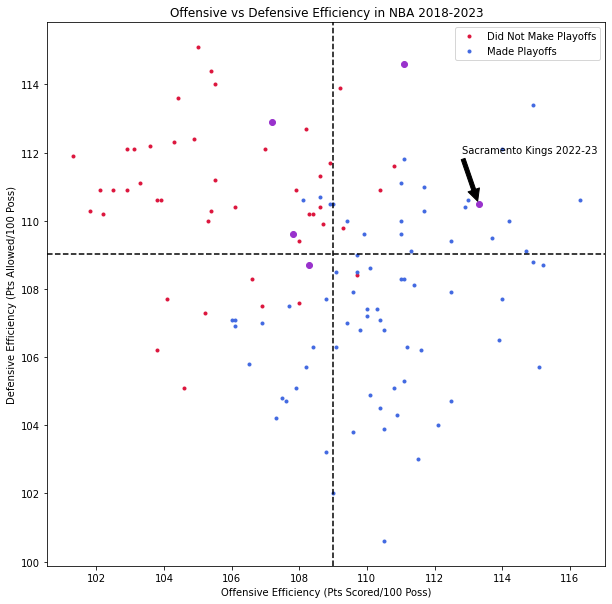

In [21]:
def comparison_plot(df, index1, index2, xloc, yloc):
    groups = df.groupby("Made Playoffs")
    plt.figure(figsize=(10, 10))
    for name, group in groups:
        if name == 0:
            name = "Did Not Make Playoffs"
            playoffcolor = 'crimson'
        else:
            name = "Made Playoffs"
            playoffcolor = 'royalblue'
        plt.plot(group.iloc[:,index1], group.iloc[:,index2], marker=".", linestyle="", label=name, color = playoffcolor)
    plt.legend()
    plt.plot(kingsfullstats_5years.iloc[:,index1], kingsfullstats_5years.iloc[:,index2], linestyle='none', marker = 'o', color ='darkorchid')
    plt.annotate('Sacramento Kings 2022-23', 
             xy=(df.iloc[kingsindex,index1], df.iloc[kingsindex,index2]), 
             xytext=(df.iloc[kingsindex,index1] + xloc, df.iloc[kingsindex,index2] + yloc),
             arrowprops=dict(facecolor='black', shrink=0.05))
    plt.axvline(mean(fullnbastats.iloc[:,index1]), color='k', linestyle='dashed')
    plt.axhline(mean(fullnbastats.iloc[:,index2]), color='k', linestyle='dashed')
    
comparison_plot(fullnbastats, fullnbastats.columns.get_loc("OFF EFF"), fullnbastats.columns.get_loc("DEF EFF"), -0.5, 1.5)
plt.xlabel("Offensive Efficiency (Pts Scored/100 Poss)")
plt.ylabel("Defensive Efficiency (Pts Allowed/100 Poss)")
plt.title("Offensive vs Defensive Efficiency in NBA 2018-2023")
plt.show()

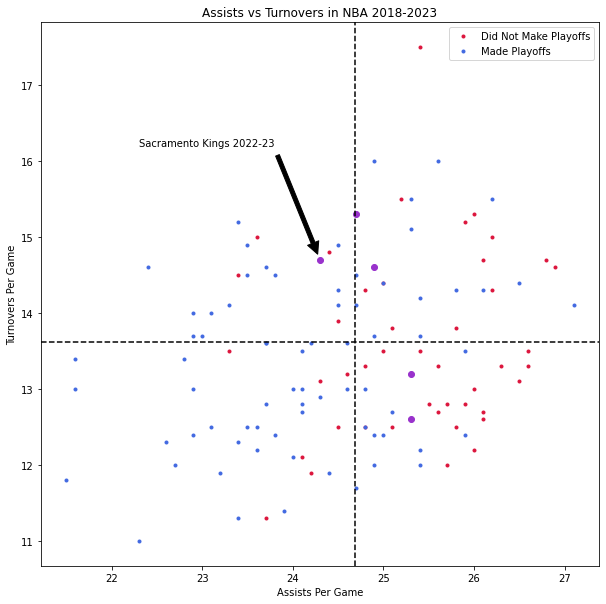

In [22]:
comparison_plot(fullnbastats, fullnbastats.columns.get_loc("AST"), fullnbastats.columns.get_loc("TO"), -2, 1.5)
plt.xlabel("Assists Per Game")
plt.ylabel("Turnovers Per Game")
plt.title("Assists vs Turnovers in NBA 2018-2023")
plt.show()

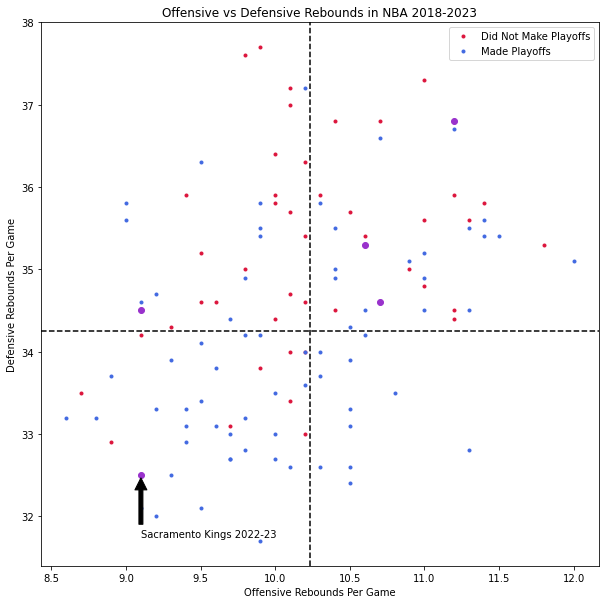

In [23]:
comparison_plot(fullnbastats, fullnbastats.columns.get_loc("OR"), fullnbastats.columns.get_loc("DR"), 0, -0.75)
plt.xlabel("Offensive Rebounds Per Game")
plt.ylabel("Defensive Rebounds Per Game")
plt.title("Offensive vs Defensive Rebounds in NBA 2018-2023")
plt.show()

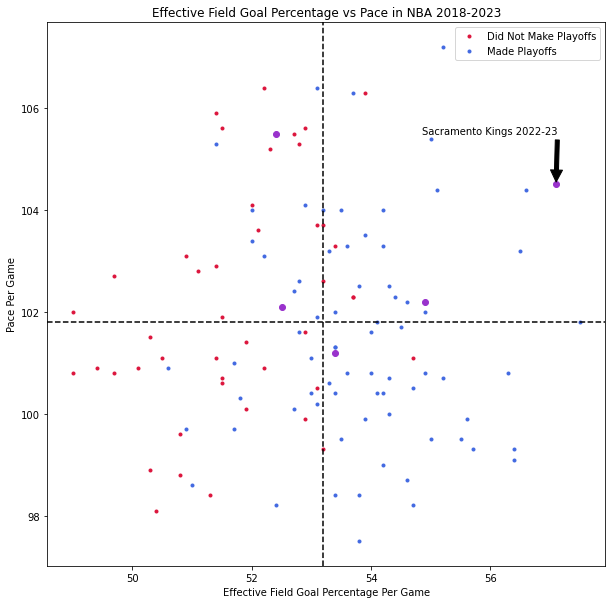

In [24]:
comparison_plot(fullnbastats, fullnbastats.columns.get_loc("EFF FG%"), fullnbastats.columns.get_loc("PACE"), -2.25, 1)
plt.xlabel("Effective Field Goal Percentage Per Game")
plt.ylabel("Pace Per Game")
plt.title("Effective Field Goal Percentage vs Pace in NBA 2018-2023")
plt.show()

## Logistic Regression: Multicollinearity

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [26]:
x = fullnbastats[30:].drop(columns = ['Made Playoffs', 'Team', 'GP'])
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,153.6,W
1,110.6,L
2,2954414.1,PTS
3,2058831.5,FGM
4,307394.4,FGA
5,598471.9,FG%
6,101597.8,3PM
7,83669.5,3PA
8,88453.4,3P%
9,180255.5,FTM


## Logistic Regression: Standardization

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


x = fullnbastats[30:].drop(columns = ['Made Playoffs', 'Team'])
colnames = x.columns
y= fullnbastats["Made Playoffs"][30:]

In [28]:
from sklearn import preprocessing
x = pd.DataFrame(preprocessing.scale(x))
x.columns = colnames

In [29]:
standardizeddata = fullnbastats.drop(columns = ['Made Playoffs', 'Team'])
colnames = standardizeddata.columns
standardizeddata = pd.DataFrame(preprocessing.scale(standardizeddata))
standardizeddata.columns = colnames
x = standardizeddata[30:]
x = x.drop(columns = ['GP', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA', 'REB', 'PACE', 'OFF EFF', 'DEF EFF'])
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,3.2,W
1,4.0,L
2,7.3,PTS
3,3.9,FG%
4,3.0,3P%
5,1.2,FT%
6,1.8,OR
7,3.1,DR
8,2.2,AST
9,1.9,STL


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
model = LogisticRegression(solver='liblinear', C = 10, random_state=0, max_iter = 1000)
model.fit(x_train, y_train)
model.classes_
model.intercept_
model.coef_
model.predict_proba(x_test)
model.predict(x_test)
model.score(x_test, y_test)

0.9166666666666666

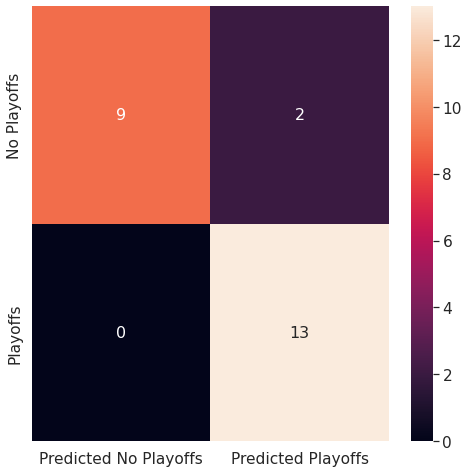

In [32]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(x_test))
df_cm = pd.DataFrame(cm, ['No Playoffs', 'Playoffs'], ['Predicted No Playoffs', 'Predicted Playoffs'])
plt.figure(figsize=(8,8))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

In [33]:
kingsfullnbastats23 = standardizeddata.iloc[kingsindex,:].drop(columns = ['GP', 'FGM', 'FGA', 'FTM', 'FTA', '3PM', '3PA', 'REB', 'PACE', 'OFF EFF', 'DEF EFF'])
print(model.predict_proba(kingsfullnbastats23))
print(model.predict(kingsfullnbastats23))

[[0.32009139 0.67990861]]
[1.]


In [34]:
#Dataframes available:
kings_stats
kings_shoot_stats
kings_salary
nbateams
kings_final_df
league_wins_losses
nbateamstats
nbaefficiencystats
pd.set_option('display.max_columns', None)
fullnbastats

,Team,W,L,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF,PACE,EFF FG%,OFF EFF,DEF EFF,Made Playoffs
0,2023 Boston Celtics,20,5,25,112.6,42.1,89.8,46.9,11.3,32.0,35.4,17.1,21.8,78.2,10.1,33.2,43.4,22.0,6.3,3.8,12.5,20.4,100.8,59.0,118.6,109.9,NaN
1,2023 Milwaukee Bucks,17,6,23,107.8,40.0,90.0,44.5,11.0,31.6,34.8,16.8,21.4,78.5,10.3,33.3,43.6,21.3,6.5,4.8,12.7,20.0,101.9,53.3,108.8,105.6,NaN
2,2023 Cleveland Cavaliers,15,9,24,105.0,38.4,84.4,45.5,11.2,31.6,35.4,17.1,22.4,76.3,9.2,30.7,39.9,22.8,7.8,4.5,14.5,22.1,98.1,54.6,111.0,104.8,NaN
3,2023 Atlanta Hawks,13,11,24,113.6,41.3,88.4,46.7,10.6,32.1,33.1,20.3,25.4,80.0,11.0,34.3,45.3,24.1,7.0,5.0,14.7,21.0,103.2,52.0,109.4,109.2,NaN
4,2023 Indiana Pacers,13,11,24,115.9,41.0,87.9,46.7,12.8,34.9,36.8,21.0,25.8,81.3,11.0,34.3,45.3,25.8,7.7,5.5,15.6,20.8,105.3,52.9,108.1,111.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2019 Minnesota Timberwolves,36,46,82,114.0,42.1,90.1,46.7,12.7,33.6,37.8,17.1,22.3,76.7,11.2,34.4,45.6,26.2,6.6,5.5,14.3,21.9,102.8,51.1,108.4,110.2,0.0
146,2019 Memphis Grizzlies,33,49,82,106.1,37.6,83.4,45.1,11.6,32.2,36.0,19.3,24.7,78.4,9.5,35.2,44.7,23.4,7.6,4.9,14.5,21.4,98.8,50.8,103.8,106.2,0.0
147,2019 New Orleans Pelicans,33,49,82,116.8,43.3,92.8,46.6,12.3,33.7,36.4,17.9,23.5,76.4,11.0,34.8,45.8,26.5,8.6,5.4,13.1,21.0,105.6,52.9,108.6,110.4,0.0
148,2019 Dallas Mavericks,33,49,82,110.1,40.9,89.2,45.9,11.2,32.5,34.4,17.1,22.0,77.7,10.2,34.6,44.8,24.5,7.8,4.5,12.5,23.2,101.4,51.9,106.6,108.3,0.0


In [35]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [36]:
#aquring links in raw form
url = "https://www.espn.com/nba/teams"
result = requests.get(url)
soup = BeautifulSoup(result.text, 'html.parser')
links = [str(link.get('href')) for link in soup.find_all("a")]
links_df = pd.DataFrame(links)
links_df.columns = ["links"]
pattern = re.compile(r'/nba/team/stats/_/name/+')
stats_links_df = links_df[links_df['links'].str.contains(pattern, regex = True)]
print(links_df)
stats_links_df

                                                 links
0                                                 None
1                                                    /
2                                                /nfl/
3                                   /college-football/
4                                                /nhl/
..                                                 ...
246              http://www.nielsen.com/digitalprivacy
247  https://privacy.thewaltdisneycompany.com/en/dn...
248  https://www.espn.com/espn/news/story?page=cont...
249                         https://disneyadsales.com/
250                https://jobs.disneycareers.com/espn

[251 rows x 1 columns]


,links
27,/nba/team/stats/_/name/bos/boston-celtics
34,/nba/team/stats/_/name/bkn/brooklyn-nets
41,/nba/team/stats/_/name/ny/new-york-knicks
48,/nba/team/stats/_/name/phi/philadelphia-76ers
55,/nba/team/stats/_/name/tor/toronto-raptors
62,/nba/team/stats/_/name/chi/chicago-bulls
69,/nba/team/stats/_/name/cle/cleveland-cavaliers
76,/nba/team/stats/_/name/det/detroit-pistons
83,/nba/team/stats/_/name/ind/indiana-pacers
90,/nba/team/stats/_/name/mil/milwaukee-bucks


In [37]:
stats_links_df = stats_links_df.reset_index().drop("index", axis = "columns")
west_conference = pd.concat([stats_links_df.iloc[10:20,:],stats_links_df.iloc[25:,:]])
west_conference_stats_links = west_conference.reset_index().drop("index", axis = "columns")
#links to team stats that are only in the western conference
west_conference_stats_links

,links
0,/nba/team/stats/_/name/den/denver-nuggets
1,/nba/team/stats/_/name/min/minnesota-timberwolves
2,/nba/team/stats/_/name/okc/oklahoma-city-thunder
3,/nba/team/stats/_/name/por/portland-trail-blazers
4,/nba/team/stats/_/name/utah/utah-jazz
5,/nba/team/stats/_/name/gs/golden-state-warriors
6,/nba/team/stats/_/name/lac/la-clippers
7,/nba/team/stats/_/name/lal/los-angeles-lakers
8,/nba/team/stats/_/name/phx/phoenix-suns
9,/nba/team/stats/_/name/sac/sacramento-kings


In [38]:
#Removing kings from links
west_conference_stats_links = west_conference_stats_links.drop(9, axis = "rows").reset_index().drop("index",axis = "columns")

In [39]:
#acquire raw data
players_df = pd.DataFrame()
for link in west_conference_stats_links["links"]:
    url = "https://www.espn.com"+link
    player_names = pd.read_html(url)[0]
    player_stats = pd.read_html(url)[1]
    player_concat = pd.concat([player_names,player_stats],axis = "columns")
    players_df = pd.concat([players_df, player_concat], ignore_index = True)

#Change this to "remove_positions(players_df) when notebooks are combined"
words = []
for i in players_df["Name"]:
    words.append(i.split()[0:2])
words = pd.DataFrame(words)
words.columns = ["First","Last"]
words["Names"] = words['First']+" "+ words["Last"]
words = words.drop("First", axis = 1).drop("Last", axis = 1)
players_df["Name"] = words
players_df = players_df.dropna().reset_index().drop("index", axis = "columns")
#Cleaned up dataframe with all player stats in western conference
pd.set_option('display.max_rows', None)
players_df


,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO
0,Nikola Jokic,20,20.0,32.2,23.2,2.0,8.2,10.1,8.9,1.3,0.6,3.3,3.0,2.7
1,Jamal Murray,19,19.0,29.8,17.9,0.5,3.2,3.7,4.9,0.9,0.3,2.0,1.3,2.5
2,Michael Porter,16,16.0,29.1,16.4,1.2,4.8,6.0,1.3,0.6,0.4,1.1,2.6,1.1
3,Aaron Gordon,20,20.0,29.2,16.1,2.4,4.3,6.7,2.3,0.7,0.9,1.4,1.8,1.6
4,Bones Hyland,15,0.0,20.5,14.1,0.3,1.7,1.9,3.3,0.6,0.3,1.8,1.6,1.9
5,Bruce Brown,23,11.0,30.0,11.2,1.0,3.5,4.5,4.5,1.1,0.5,1.9,2.4,2.4
6,Kentavious Caldwell-Pope,22,22.0,31.2,11.0,0.5,2.4,2.9,2.1,1.2,0.4,1.3,1.9,1.6
7,Jeff Green,16,3.0,19.9,7.9,0.8,1.8,2.6,1.2,0.4,0.2,1.0,2.1,1.2
8,Vlatko Cancar,15,0.0,12.7,5.3,0.3,1.4,1.7,0.9,0.5,0.3,0.5,1.5,1.8
9,DeAndre Jordan,19,3.0,15.7,5.3,1.6,4.3,5.9,1.0,0.2,0.6,1.3,1.6,0.8


In [40]:
players_df_shoot = pd.DataFrame()
for link in west_conference_stats_links["links"]:
    url = "https://www.espn.com"+link
    player_names = pd.read_html(url)[0]
    player_shoot = pd.read_html(url)[3]
    player_concat = pd.concat([player_names,player_shoot],axis = "columns")
    
    players_df_shoot = pd.concat([players_df_shoot, player_concat], ignore_index = True)

#Change this to "remove_positions(players_df_shoot) when notebooks are combined"
words = []
for i in players_df_shoot["Name"]:
    words.append(i.split()[0:2])
words = pd.DataFrame(words)
words.columns = ["First","Last"]
words["Names"] = words['First']+" "+ words["Last"]
words = words.drop("First", axis = 1).drop("Last", axis = 1)
players_df_shoot["Name"] = words
players_df_shoot = players_df_shoot.dropna().reset_index().drop("index", axis = "columns")
#Cleaned up dataframe with all player stats in western conference
players_df_shoot


,Name,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF
0,Nikola Jokic,8.7,13.7,63.5,0.8,2.4,34.0,5.0,6.2,80.6,7.9,11.4,69.6,1.693,0.66
1,Jamal Murray,6.8,15.5,44.2,2.0,5.3,38.0,2.3,2.9,78.2,4.8,10.2,47.4,1.160,0.51
2,Michael Porter,6.0,12.9,46.6,2.9,6.9,42.7,1.5,1.9,80.0,3.1,6.0,51.0,1.277,0.58
3,Aaron Gordon,6.2,10.2,60.8,1.1,2.8,37.5,2.7,4.2,63.1,5.2,7.4,69.6,1.578,0.66
4,Bones Hyland,4.6,11.5,39.9,2.7,6.1,43.5,2.2,2.7,80.5,1.9,5.4,35.8,1.220,0.51
5,Bruce Brown,4.5,9.5,47.2,1.3,3.4,39.7,0.9,1.0,87.5,3.1,6.1,51.4,1.183,0.54
6,Kentavious Caldwell-Pope,3.9,8.4,45.9,2.1,4.5,46.0,1.1,1.5,78.1,1.8,3.9,45.9,1.303,0.58
7,Jeff Green,2.9,5.6,52.8,0.3,1.3,25.0,1.8,2.3,77.8,2.6,4.3,60.9,1.427,0.56
8,Vlatko Cancar,2.0,4.3,46.9,0.9,2.3,41.2,0.4,0.5,85.7,1.1,2.0,53.3,1.250,0.58
9,DeAndre Jordan,2.3,3.0,75.4,0.1,0.1,100.0,0.7,1.6,46.7,2.2,2.9,75.0,1.772,0.76


In [41]:
#Next few cells are for acquiring salary of all players in western conference

url2 = "https://www.espn.com/nba/team/roster/_/name/sac/salary"
kings_salary_raw = pd.read_html(url2)[0]

pattern_sal = re.compile(r'/nba/team/roster/_/+')
sal_links_df = links_df[links_df['links'].str.contains(pattern_sal, regex = True)]


west_conference_sal = pd.concat([sal_links_df.iloc[10:20,:],sal_links_df.iloc[25:,:]])
west_conference_sal_links = west_conference_sal.reset_index().drop("index", axis = "columns")
#links to all pages with team salaries
west_conference_sal_links

,links
0,/nba/team/roster/_/name/den/denver-nuggets
1,/nba/team/roster/_/name/min/minnesota-timberwo...
2,/nba/team/roster/_/name/okc/oklahoma-city-thunder
3,/nba/team/roster/_/name/por/portland-trail-bla...
4,/nba/team/roster/_/name/utah/utah-jazz
5,/nba/team/roster/_/name/gs/golden-state-warriors
6,/nba/team/roster/_/name/lac/la-clippers
7,/nba/team/roster/_/name/lal/los-angeles-lakers
8,/nba/team/roster/_/name/phx/phoenix-suns
9,/nba/team/roster/_/name/sac/sacramento-kings


In [42]:
#Removed kings from links
west_conference_sal_links = west_conference_sal_links.drop(9, axis = "rows").reset_index().drop("index",axis = "columns")
west_conference_sal_links

,links
0,/nba/team/roster/_/name/den/denver-nuggets
1,/nba/team/roster/_/name/min/minnesota-timberwo...
2,/nba/team/roster/_/name/okc/oklahoma-city-thunder
3,/nba/team/roster/_/name/por/portland-trail-bla...
4,/nba/team/roster/_/name/utah/utah-jazz
5,/nba/team/roster/_/name/gs/golden-state-warriors
6,/nba/team/roster/_/name/lac/la-clippers
7,/nba/team/roster/_/name/lal/los-angeles-lakers
8,/nba/team/roster/_/name/phx/phoenix-suns
9,/nba/team/roster/_/name/dal/dallas-mavericks


In [43]:
#What the salary page returns; we only care about name and salary
pd.read_html("https://www.espn.com/nba/team/roster/_/name/den/denver-nuggets")

[    Unnamed: 0                       Name POS  Age      HT       WT  \
 0          NaN           Christian Braun0   G   21   6' 6"  220 lbs   
 1          NaN              Bruce Brown11  SF   26   6' 4"  202 lbs   
 2          NaN  Kentavious Caldwell-Pope5  SG   29   6' 5"  204 lbs   
 3          NaN            Vlatko Cancar31  SF   25   6' 8"  236 lbs   
 4          NaN         Collin Gillespie21   G   23   6' 1"  195 lbs   
 5          NaN             Aaron Gordon50  PF   27   6' 8"  235 lbs   
 6          NaN               Jeff Green32  PF   36   6' 8"  235 lbs   
 7          NaN              Bones Hyland3  PG   22   6' 2"  169 lbs   
 8          NaN             Nikola Jokic15   C   27  6' 11"  284 lbs   
 9          NaN            DeAndre Jordan6   C   34  6' 11"  265 lbs   
 10         NaN             Jamal Murray27  PG   25   6' 4"  215 lbs   
 11         NaN               Zeke Nnaji22  PF   21   6' 9"  240 lbs   
 12         NaN        Michael Porter Jr.1  SF   24  6' 10"  218

In [44]:
#Acquiring the salaries from the links
sal_players_df = pd.DataFrame()
for link in west_conference_sal_links["links"]:
    url = "https://www.espn.com"+link
    player_salaries = pd.read_html(url)[0]
    sal_players_df = pd.concat([sal_players_df, player_salaries], ignore_index = True)
sal_players_df

,Unnamed: 0,Name,POS,Age,HT,WT,College,Salary
0,NaN,Christian Braun0,G,21,"6' 6""",220 lbs,Kansas,"$2,808,600"
1,NaN,Bruce Brown11,SF,26,"6' 4""",202 lbs,Miami (FL),"$6,479,000"
2,NaN,Kentavious Caldwell-Pope5,SG,29,"6' 5""",204 lbs,Georgia,"$14,004,703"
3,NaN,Vlatko Cancar31,SF,25,"6' 8""",236 lbs,--,"$2,234,359"
4,NaN,Collin Gillespie21,G,23,"6' 1""",195 lbs,Villanova,--
5,NaN,Aaron Gordon50,PF,27,"6' 8""",235 lbs,Arizona,"$19,690,909"
6,NaN,Jeff Green32,PF,36,"6' 8""",235 lbs,Georgetown,"$4,500,000"
7,NaN,Bones Hyland3,PG,22,"6' 2""",169 lbs,Virginia Commonwealth,"$2,201,520"
8,NaN,Nikola Jokic15,C,27,"6' 11""",284 lbs,--,"$33,047,804"
9,NaN,DeAndre Jordan6,C,34,"6' 11""",265 lbs,Texas A&M,"$1,836,090"


In [45]:
#Cleaning
for i in range(0,len(sal_players_df)):
    sal_players_df.loc[:,"Name"][i] = re.sub(r"\d+", "", str(sal_players_df.loc[:,"Name"][i]))

/tmp/ipykernel_1012/3537221818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_players_df.loc[:,"Name"][i] = re.sub(r"\d+", "", str(sal_players_df.loc[:,"Name"][i]))


In [46]:
#Cleaning
sal_players_df = sal_players_df.set_index("Name").drop('Unnamed: 0', axis = 1)
sal_players_df = sal_players_df.drop(['POS', 'Age', 'HT', 'WT', 'College'], axis = 1)
#Clean salary dataframe
sal_players_df

,Salary
Name,
Christian Braun,"$2,808,600"
Bruce Brown,"$6,479,000"
Kentavious Caldwell-Pope,"$14,004,703"
Vlatko Cancar,"$2,234,359"
Collin Gillespie,--
Aaron Gordon,"$19,690,909"
Jeff Green,"$4,500,000"
Bones Hyland,"$2,201,520"
Nikola Jokic,"$33,047,804"


In [47]:
#Merge western conference player stats with their salaries
players_stats_salary = pd.merge(players_df,sal_players_df, how = "left", on = "Name")
player_stats_shoot_salary = pd.merge(players_stats_salary, players_df_shoot, how = "left", on = "Name")
player_stats_shoot_salary
salary = player_stats_shoot_salary.pop("Salary")
player_stats_shoot_salary = pd.concat([player_stats_shoot_salary, salary], axis = 'columns')
player_stats_shoot_salary

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,Nikola Jokic,20,20.0,32.2,23.2,2.0,8.2,10.1,8.9,1.3,0.6,3.3,3.0,2.7,8.7,13.7,63.5,0.8,2.4,34.0,5.0,6.2,80.6,7.9,11.4,69.6,1.693,0.66,"$33,047,804"
1,Jamal Murray,19,19.0,29.8,17.9,0.5,3.2,3.7,4.9,0.9,0.3,2.0,1.3,2.5,6.8,15.5,44.2,2.0,5.3,38.0,2.3,2.9,78.2,4.8,10.2,47.4,1.160,0.51,"$31,650,000"
2,Michael Porter,16,16.0,29.1,16.4,1.2,4.8,6.0,1.3,0.6,0.4,1.1,2.6,1.1,6.0,12.9,46.6,2.9,6.9,42.7,1.5,1.9,80.0,3.1,6.0,51.0,1.277,0.58,NaN
3,Aaron Gordon,20,20.0,29.2,16.1,2.4,4.3,6.7,2.3,0.7,0.9,1.4,1.8,1.6,6.2,10.2,60.8,1.1,2.8,37.5,2.7,4.2,63.1,5.2,7.4,69.6,1.578,0.66,"$19,690,909"
4,Bones Hyland,15,0.0,20.5,14.1,0.3,1.7,1.9,3.3,0.6,0.3,1.8,1.6,1.9,4.6,11.5,39.9,2.7,6.1,43.5,2.2,2.7,80.5,1.9,5.4,35.8,1.220,0.51,"$2,201,520"
5,Bruce Brown,23,11.0,30.0,11.2,1.0,3.5,4.5,4.5,1.1,0.5,1.9,2.4,2.4,4.5,9.5,47.2,1.3,3.4,39.7,0.9,1.0,87.5,3.1,6.1,51.4,1.183,0.54,"$6,479,000"
6,Kentavious Caldwell-Pope,22,22.0,31.2,11.0,0.5,2.4,2.9,2.1,1.2,0.4,1.3,1.9,1.6,3.9,8.4,45.9,2.1,4.5,46.0,1.1,1.5,78.1,1.8,3.9,45.9,1.303,0.58,"$14,004,703"
7,Jeff Green,16,3.0,19.9,7.9,0.8,1.8,2.6,1.2,0.4,0.2,1.0,2.1,1.2,2.9,5.6,52.8,0.3,1.3,25.0,1.8,2.3,77.8,2.6,4.3,60.9,1.427,0.56,"$4,500,000"
8,Vlatko Cancar,15,0.0,12.7,5.3,0.3,1.4,1.7,0.9,0.5,0.3,0.5,1.5,1.8,2.0,4.3,46.9,0.9,2.3,41.2,0.4,0.5,85.7,1.1,2.0,53.3,1.250,0.58,"$2,234,359"
9,DeAndre Jordan,19,3.0,15.7,5.3,1.6,4.3,5.9,1.0,0.2,0.6,1.3,1.6,0.8,2.3,3.0,75.4,0.1,0.1,100.0,0.7,1.6,46.7,2.2,2.9,75.0,1.772,0.76,"$1,836,090"


In [48]:
#replace all the "--" and NAN to 0
player_stats_shoot_salary['Salary'] = player_stats_shoot_salary['Salary'].replace("--", '0')
player_stats_shoot_salary['Salary'] = player_stats_shoot_salary['Salary'].replace(np.NaN, '0')
#remove $ and , signals
for i in range(0,len(player_stats_shoot_salary)):
    player_stats_shoot_salary['Salary'][i] = player_stats_shoot_salary['Salary'][i].lstrip('$')
    player_stats_shoot_salary['Salary'][i] = player_stats_shoot_salary['Salary'][i].replace(',','')
    #turn Salary to numbers
    player_stats_shoot_salary['Salary'][i] = int(player_stats_shoot_salary['Salary'][i])
#replace all 0 to NAN
player_stats_shoot_salary['Salary'] = player_stats_shoot_salary['Salary'].replace(0, np.NaN)
#drop all NAN
player_stats_shoot_salary_temp = player_stats_shoot_salary.dropna()


/tmp/ipykernel_1012/720164291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats_shoot_salary['Salary'][i] = player_stats_shoot_salary['Salary'][i].lstrip('$')
/tmp/ipykernel_1012/720164291.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats_shoot_salary['Salary'][i] = player_stats_shoot_salary['Salary'][i].replace(',','')
/tmp/ipykernel_1012/720164291.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playe

In [49]:
#final dataset
pd.set_option('display.max_columns', None)

player_stats_shoot_salary_temp

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,Nikola Jokic,20,20.0,32.2,23.2,2.0,8.2,10.1,8.9,1.3,0.6,3.3,3.0,2.7,8.7,13.7,63.5,0.8,2.4,34.0,5.0,6.2,80.6,7.9,11.4,69.6,1.693,0.66,33047804.0
1,Jamal Murray,19,19.0,29.8,17.9,0.5,3.2,3.7,4.9,0.9,0.3,2.0,1.3,2.5,6.8,15.5,44.2,2.0,5.3,38.0,2.3,2.9,78.2,4.8,10.2,47.4,1.160,0.51,31650000.0
3,Aaron Gordon,20,20.0,29.2,16.1,2.4,4.3,6.7,2.3,0.7,0.9,1.4,1.8,1.6,6.2,10.2,60.8,1.1,2.8,37.5,2.7,4.2,63.1,5.2,7.4,69.6,1.578,0.66,19690909.0
4,Bones Hyland,15,0.0,20.5,14.1,0.3,1.7,1.9,3.3,0.6,0.3,1.8,1.6,1.9,4.6,11.5,39.9,2.7,6.1,43.5,2.2,2.7,80.5,1.9,5.4,35.8,1.220,0.51,2201520.0
5,Bruce Brown,23,11.0,30.0,11.2,1.0,3.5,4.5,4.5,1.1,0.5,1.9,2.4,2.4,4.5,9.5,47.2,1.3,3.4,39.7,0.9,1.0,87.5,3.1,6.1,51.4,1.183,0.54,6479000.0
6,Kentavious Caldwell-Pope,22,22.0,31.2,11.0,0.5,2.4,2.9,2.1,1.2,0.4,1.3,1.9,1.6,3.9,8.4,45.9,2.1,4.5,46.0,1.1,1.5,78.1,1.8,3.9,45.9,1.303,0.58,14004703.0
7,Jeff Green,16,3.0,19.9,7.9,0.8,1.8,2.6,1.2,0.4,0.2,1.0,2.1,1.2,2.9,5.6,52.8,0.3,1.3,25.0,1.8,2.3,77.8,2.6,4.3,60.9,1.427,0.56,4500000.0
8,Vlatko Cancar,15,0.0,12.7,5.3,0.3,1.4,1.7,0.9,0.5,0.3,0.5,1.5,1.8,2.0,4.3,46.9,0.9,2.3,41.2,0.4,0.5,85.7,1.1,2.0,53.3,1.250,0.58,2234359.0
9,DeAndre Jordan,19,3.0,15.7,5.3,1.6,4.3,5.9,1.0,0.2,0.6,1.3,1.6,0.8,2.3,3.0,75.4,0.1,0.1,100.0,0.7,1.6,46.7,2.2,2.9,75.0,1.772,0.76,1836090.0
10,Zeke Nnaji,17,0.0,9.8,4.4,0.9,0.5,1.4,0.2,0.2,0.1,0.5,1.5,0.4,1.9,3.2,58.2,0.2,0.8,21.4,0.5,0.6,80.0,1.7,2.4,70.7,1.364,0.61,2498760.0


### Correlations and Averages

<AxesSubplot:>

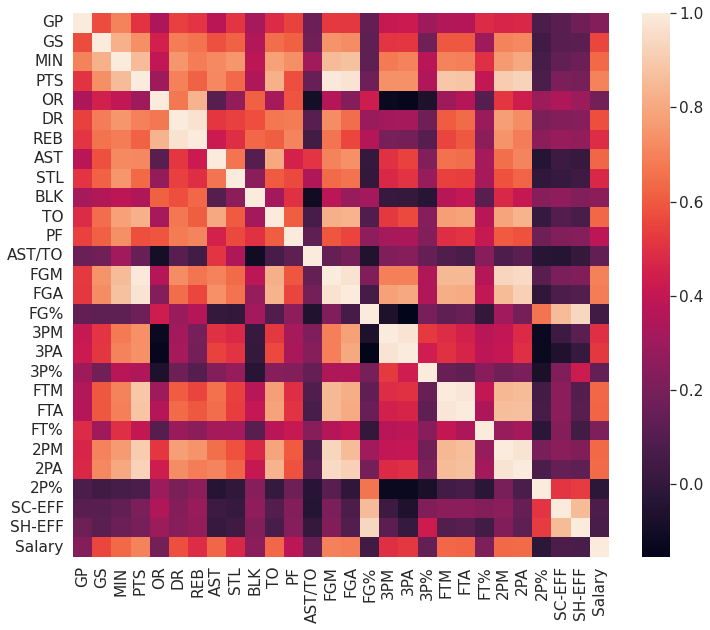

In [50]:
#setting up heatmap for correlations between all statistics
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
corr = player_stats_shoot_salary.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

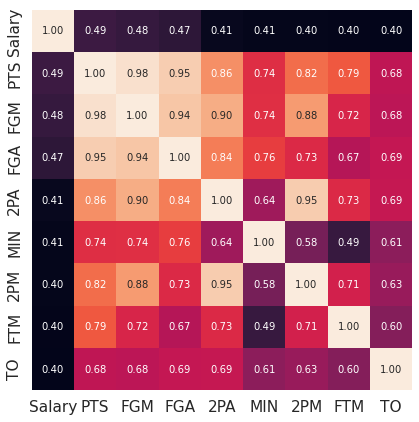

In [51]:
#function that creates heatmaps for the 8 variables that are most strongly correlated with % of Cap for each of the data subsets
def heatMap(df, k):
    corrmat = df.corr(method='pearson', min_periods=1)
    r_square = corrmat ** 2
    ## Top K-1 correlated variables
    cols = r_square.nlargest(k, 'Salary')['Salary'].index
    cm = df[cols].corr()
    cm_square = cm ** 2
    f, ax = plt.subplots(figsize=(7, 7))
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
heatMap(player_stats_shoot_salary, 9)

In [52]:
#creating scatter plots to further look at the relationships between % of Cap and other vars
#sns.set()
#sns.pairplot(player_stats_shoot_salary, height=5)
#plt.show()

In [53]:
# Many statistical tests make the assumption that datasets are normally distributed. However, this is often not the case in practice.
# One way to address this issue is to transform the distribution of values in a dataset using log transformations
player_stats_shoot_salary['Salary'] = np.log(player_stats_shoot_salary['Salary'])
player_stats_shoot_salary

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,Nikola Jokic,20,20.0,32.2,23.2,2.0,8.2,10.1,8.9,1.3,0.6,3.3,3.0,2.7,8.7,13.7,63.5,0.8,2.4,34.0,5.0,6.2,80.6,7.9,11.4,69.6,1.693,0.66,17.313466
1,Jamal Murray,19,19.0,29.8,17.9,0.5,3.2,3.7,4.9,0.9,0.3,2.0,1.3,2.5,6.8,15.5,44.2,2.0,5.3,38.0,2.3,2.9,78.2,4.8,10.2,47.4,1.160,0.51,17.270249
2,Michael Porter,16,16.0,29.1,16.4,1.2,4.8,6.0,1.3,0.6,0.4,1.1,2.6,1.1,6.0,12.9,46.6,2.9,6.9,42.7,1.5,1.9,80.0,3.1,6.0,51.0,1.277,0.58,NaN
3,Aaron Gordon,20,20.0,29.2,16.1,2.4,4.3,6.7,2.3,0.7,0.9,1.4,1.8,1.6,6.2,10.2,60.8,1.1,2.8,37.5,2.7,4.2,63.1,5.2,7.4,69.6,1.578,0.66,16.795668
4,Bones Hyland,15,0.0,20.5,14.1,0.3,1.7,1.9,3.3,0.6,0.3,1.8,1.6,1.9,4.6,11.5,39.9,2.7,6.1,43.5,2.2,2.7,80.5,1.9,5.4,35.8,1.220,0.51,14.604659
5,Bruce Brown,23,11.0,30.0,11.2,1.0,3.5,4.5,4.5,1.1,0.5,1.9,2.4,2.4,4.5,9.5,47.2,1.3,3.4,39.7,0.9,1.0,87.5,3.1,6.1,51.4,1.183,0.54,15.684077
6,Kentavious Caldwell-Pope,22,22.0,31.2,11.0,0.5,2.4,2.9,2.1,1.2,0.4,1.3,1.9,1.6,3.9,8.4,45.9,2.1,4.5,46.0,1.1,1.5,78.1,1.8,3.9,45.9,1.303,0.58,16.454904
7,Jeff Green,16,3.0,19.9,7.9,0.8,1.8,2.6,1.2,0.4,0.2,1.0,2.1,1.2,2.9,5.6,52.8,0.3,1.3,25.0,1.8,2.3,77.8,2.6,4.3,60.9,1.427,0.56,15.319588
8,Vlatko Cancar,15,0.0,12.7,5.3,0.3,1.4,1.7,0.9,0.5,0.3,0.5,1.5,1.8,2.0,4.3,46.9,0.9,2.3,41.2,0.4,0.5,85.7,1.1,2.0,53.3,1.250,0.58,14.619465
9,DeAndre Jordan,19,3.0,15.7,5.3,1.6,4.3,5.9,1.0,0.2,0.6,1.3,1.6,0.8,2.3,3.0,75.4,0.1,0.1,100.0,0.7,1.6,46.7,2.2,2.9,75.0,1.772,0.76,14.423149


In [54]:
x = player_stats_shoot_salary[['GP', 'GS', 'MIN', 'PTS', 'OR', 'DR', 'REB', 'AST', 'STL','BLK', 'TO', 'PF', #'AST/TO', 
                              'FGM', 'FGA', 'FG%', '3PM', '3PA','3P%', 'FTM', 'FTA', 'FT%', '2PM', '2PA', '2P%', 'SC-EFF', 'SH-EFF']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)
#lower VIF factor values means less multicollinearity

,VIF Factor,features
0,15.7,GP
1,6.8,GS
2,77.0,MIN
3,32291.3,PTS
4,620.2,OR
5,4469.9,DR
6,7933.5,REB
7,9.4,AST
8,9.8,STL
9,3.9,BLK


In [55]:
# remove some features from dataframe because their VIF factor values are far too high
DF = player_stats_shoot_salary[['GS', 'PTS', 'REB', 'AST', 'STL','BLK', '3P%', '2P%']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(DF.values, i) for i in range(DF.shape[1])]
vif["features"] = DF.columns
vif.round(1)

,VIF Factor,features
0,4.6,GS
1,9.7,PTS
2,9.1,REB
3,5.4,AST
4,6.8,STL
5,3.5,BLK
6,4.0,3P%
7,4.8,2P%


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.linear_model import LinearRegression

#target array
y=player_stats_shoot_salary[['Salary']]


#ADVANCED STATS
linreg = LinearRegression()

#Linear regression on all three subsets of data to see which scores the best
x_train, x_test, y_train, y_test=train_test_split(DF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, DF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for Salary')
plt.ylabel('Residual Values')
plt.title('Residual Plotusing Linear Regression Model')
plt.show()

#that's the subsection that I will be using to look at overvalued and undervalued players
#positive residual=overvalued, negative=undervalued
player_stats_shoot_salary['Predicted Salary']=predict
player_stats_shoot_salary['Residuals']=residuals
player_stats_shoot_salary['Resid %']=(player_stats_shoot_salary['Residuals']/player_stats_shoot_salary['Salary']*100)

In [56]:
copy=player_stats_shoot_salary
copy=copy[['Name','GS', 'PTS', 'REB', 'AST', 'STL','BLK', '3P%', '2P%', 'Salary']] #'Predicted Salary', 'Residuals']]
#copy=copy.sort_values('Residuals')
#get top25 most undervalued players

top25=copy[:25]
top25


,Name,GS,PTS,REB,AST,STL,BLK,3P%,2P%,Salary
0,Nikola Jokic,20.0,23.2,10.1,8.9,1.3,0.6,34.0,69.6,17.313466
1,Jamal Murray,19.0,17.9,3.7,4.9,0.9,0.3,38.0,47.4,17.270249
2,Michael Porter,16.0,16.4,6.0,1.3,0.6,0.4,42.7,51.0,NaN
3,Aaron Gordon,20.0,16.1,6.7,2.3,0.7,0.9,37.5,69.6,16.795668
4,Bones Hyland,0.0,14.1,1.9,3.3,0.6,0.3,43.5,35.8,14.604659
5,Bruce Brown,11.0,11.2,4.5,4.5,1.1,0.5,39.7,51.4,15.684077
6,Kentavious Caldwell-Pope,22.0,11.0,2.9,2.1,1.2,0.4,46.0,45.9,16.454904
7,Jeff Green,3.0,7.9,2.6,1.2,0.4,0.2,25.0,60.9,15.319588
8,Vlatko Cancar,0.0,5.3,1.7,0.9,0.5,0.3,41.2,53.3,14.619465
9,DeAndre Jordan,3.0,5.3,5.9,1.0,0.2,0.6,100.0,75.0,14.423149


In [57]:
GSMean=top25['GS'].mean()
print ('Average Game Started is:',GSMean)

PTSMean=top25['PTS'].mean()
print ('Average Point is:',PTSMean)

REBMean=top25['REB'].mean()
print ('Average Rebounds is:',REBMean)

ASTMean=top25['AST'].mean()
print ('Average Assists is:',ASTMean)

STLMean=top25['STL'].mean()
print ('Average Steals is:',STLMean)

BLKMean=top25['BLK'].mean()
print ('Average Blocks is:',BLKMean)

P3Mean=top25['3P%'].mean()
print ('Average Three-Point Field Goals Percentage is:',P3Mean)

P2Mean=top25['2P%'].mean()
print ('Average Two-Point Field Goals Percentage is:',P2Mean)

SalaryMean=top25['Salary'].mean()
print ('Average Salary in log is:',SalaryMean)

#residMean=bottom25['Residuals'].mean()
#print ('Average absolute value Residual is:',-1*residMean, '%')

Average Game Started is: 9.04
Average Point is: 10.416000000000002
Average Rebounds is: 3.928
Average Assists is: 2.364
Average Steals is: 0.664
Average Blocks is: 0.4919999999999999
Average Three-Point Field Goals Percentage is: 34.11599999999999
Average Two-Point Field Goals Percentage is: 53.135999999999996
Average Salary in log is: 15.659095427287019


In [58]:
#hist=top25.hist(column='Residuals')

In [59]:
#get most overvalued players by residuals
bottom25=copy[-25:]
bottom25

,Name,GS,PTS,REB,AST,STL,BLK,3P%,2P%,Salary
199,Devonte' Graham,0.0,5.8,1.5,2.2,0.5,0.3,39.6,25.0,16.262196
200,Dyson Daniels,2.0,5.3,3.9,2.2,0.7,0.3,40.9,55.0,15.521821
201,Willy Hernangomez,0.0,5.2,4.0,0.5,0.3,0.2,0.0,53.1,14.708975
202,Garrett Temple,0.0,2.9,0.7,0.3,0.7,0.1,38.5,44.4,15.406784
203,Jaxson Hayes,0.0,1.1,1.8,0.6,0.3,0.1,0.0,37.5,15.732876
204,Dereon Seabron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
205,Devin Vassell,17.0,20.5,4.2,3.6,0.7,0.4,41.8,48.8,15.305489
206,Keldon Johnson,22.0,20.4,5.1,3.1,0.9,0.1,34.6,43.3,15.169546
207,Jakob Poeltl,20.0,12.9,9.9,3.5,0.9,1.0,0.0,64.0,16.056023
208,Tre Jones,23.0,12.1,3.4,6.9,1.5,0.2,30.5,45.0,14.393595


In [60]:
GSMean=bottom25['GS'].mean()
print ('Average Game Started is:',GSMean)

PTSMean=bottom25['PTS'].mean()
print ('Average Point is:',PTSMean)

REBMean=bottom25['REB'].mean()
print ('Average Rebounds is:',REBMean)

ASTMean=bottom25['AST'].mean()
print ('Average Assists is:',ASTMean)

STLMean=bottom25['STL'].mean()
print ('Average Steals is:',STLMean)

BLKMean=bottom25['BLK'].mean()
print ('Average Blocks is:',BLKMean)


P3Mean=bottom25['3P%'].mean()
print ('Average Three-Point Field Goals Percentage is:',P3Mean)

P2Mean=bottom25['2P%'].mean()
print ('Average Two-Point Field Goals Percentage is:',P2Mean)

SalaryMean=bottom25['Salary'].mean()
print ('Average Salary in log is:',SalaryMean)

#residMean=bottom25['Residuals'].mean()
#print ('Average absolute value Residual is:',-1*residMean, '%')

Average Game Started is: 4.88
Average Point is: 7.152
Average Rebounds is: 3.0599999999999996
Average Assists is: 1.9400000000000004
Average Steals is: 0.48800000000000004
Average Blocks is: 0.30400000000000005
Average Three-Point Field Goals Percentage is: 25.427999999999997
Average Two-Point Field Goals Percentage is: 51.852
Average Salary in log is: 15.204760116481433


In [61]:
#graph=bottom25.hist(column='Residuals')

The most undervalued players are mostly young, up and coming stars who are still on their rookie contracts, and therefore don’t take up much salary cap room. The most overvalued players were mostly in their prime superstars who were paid accordingly.

Conclusions
The two main conclusions from my analysis are as follows:

As obvious as it seems, players who score more points and make more field goals are going to be paid a higher salary, and that is why the regular subcategory produced a better model than the advanced model, which was the subcategory that I thought was going to produce the best model.
Teams who placed a higher value on their players than what the market would dictate they were worth actually had more team success. This is most likely to contributed to the presence of star players on these teams, which the model tended to view as overvalued.

In [62]:
import pandas as pd
import statsmodels.api as sm 
pd.set_option('display.max_columns', None)

In [63]:
kings_final_df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,De'Aaron Fox,21,21.0,31.7,23.1,0.5,4.6,5.1,5.8,1.1,0.5,2.6,2.5,2.2,8.6,16.6,51.6,1.9,5.0,38.1,4.1,5.0,81.9,6.7,11.6,57.4,1.393,0.57,"$28,103,550"
1,Domantas Sabonis,22,22.0,32.0,16.7,2.2,8.8,11.0,6.5,0.7,0.5,2.5,3.8,2.6,6.0,10.1,59.9,0.5,1.2,37.0,4.2,5.5,75.4,5.6,8.9,63.1,1.658,0.62,"$18,500,000"
2,Kevin Huerter,22,22.0,31.8,15.5,0.4,2.8,3.2,3.2,1.0,0.4,1.5,2.4,2.2,5.5,11.5,47.4,3.0,7.1,42.3,1.6,2.4,69.2,2.5,4.4,55.7,1.352,0.60,"$14,508,929"
3,Malik Monk,22,0.0,22.3,14.7,0.4,1.7,2.1,4.3,0.7,0.2,1.9,1.8,2.3,5.4,11.0,48.8,2.1,5.7,36.8,1.9,2.1,89.4,3.3,5.3,61.5,1.339,0.58,"$9,472,219"
4,Harrison Barnes,22,22.0,30.6,13.2,1.0,4.4,5.5,1.9,0.9,0.1,1.2,1.4,1.5,4.1,8.4,48.9,1.0,3.3,30.1,4.0,4.8,84.0,3.1,5.0,61.3,1.582,0.55,"$18,352,273"
5,Keegan Murray,20,18.0,28.4,11.3,0.9,3.2,4.1,0.9,0.8,0.6,1.6,2.1,0.6,4.1,9.9,41.4,1.9,5.7,33.3,1.2,1.4,85.2,2.2,4.2,52.4,1.136,0.51,"$8,008,440"
6,Terence Davis,20,1.0,13.2,7.0,0.5,2.6,3.0,1.5,0.8,0.2,0.8,1.8,2.0,2.5,5.6,43.8,1.4,3.6,39.4,0.7,0.8,87.5,1.1,2.1,51.2,1.250,0.56,"$4,000,000"
7,Davion Mitchell,22,1.0,19.2,6.7,0.1,1.3,1.4,2.3,0.5,0.2,1.0,1.6,2.2,2.7,6.0,44.7,0.8,2.7,30.5,0.5,0.7,73.3,1.9,3.3,56.2,1.114,0.52,"$4,833,600"
8,Trey Lyles,17,0.0,14.2,6.3,1.0,1.8,2.8,0.8,0.4,0.4,1.0,1.2,0.8,2.1,5.1,40.7,1.2,3.6,34.4,0.9,1.3,72.7,0.8,1.5,56.0,1.244,0.53,"$2,700,000"
9,Chimezie Metu,18,0.0,12.6,5.9,0.7,2.8,3.5,0.8,0.3,0.3,0.7,1.2,1.2,2.5,4.0,62.5,0.2,0.9,18.8,0.8,0.9,87.5,2.3,3.1,75.0,1.486,0.65,"$1,910,680"


In [64]:
import plotnine as p9
import numpy as np
import statsmodels.api as sm 
import pandas as pd
import re

#pd.set_option('display.max_rows', None)


### DATA CLEANING

In [65]:
df = player_stats_shoot_salary_temp
df_names = df["Name"]
df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,Nikola Jokic,20,20.0,32.2,23.2,2.0,8.2,10.1,8.9,1.3,0.6,3.3,3.0,2.7,8.7,13.7,63.5,0.8,2.4,34.0,5.0,6.2,80.6,7.9,11.4,69.6,1.693,0.66,33047804.0
1,Jamal Murray,19,19.0,29.8,17.9,0.5,3.2,3.7,4.9,0.9,0.3,2.0,1.3,2.5,6.8,15.5,44.2,2.0,5.3,38.0,2.3,2.9,78.2,4.8,10.2,47.4,1.160,0.51,31650000.0
3,Aaron Gordon,20,20.0,29.2,16.1,2.4,4.3,6.7,2.3,0.7,0.9,1.4,1.8,1.6,6.2,10.2,60.8,1.1,2.8,37.5,2.7,4.2,63.1,5.2,7.4,69.6,1.578,0.66,19690909.0
4,Bones Hyland,15,0.0,20.5,14.1,0.3,1.7,1.9,3.3,0.6,0.3,1.8,1.6,1.9,4.6,11.5,39.9,2.7,6.1,43.5,2.2,2.7,80.5,1.9,5.4,35.8,1.220,0.51,2201520.0
5,Bruce Brown,23,11.0,30.0,11.2,1.0,3.5,4.5,4.5,1.1,0.5,1.9,2.4,2.4,4.5,9.5,47.2,1.3,3.4,39.7,0.9,1.0,87.5,3.1,6.1,51.4,1.183,0.54,6479000.0
6,Kentavious Caldwell-Pope,22,22.0,31.2,11.0,0.5,2.4,2.9,2.1,1.2,0.4,1.3,1.9,1.6,3.9,8.4,45.9,2.1,4.5,46.0,1.1,1.5,78.1,1.8,3.9,45.9,1.303,0.58,14004703.0
7,Jeff Green,16,3.0,19.9,7.9,0.8,1.8,2.6,1.2,0.4,0.2,1.0,2.1,1.2,2.9,5.6,52.8,0.3,1.3,25.0,1.8,2.3,77.8,2.6,4.3,60.9,1.427,0.56,4500000.0
8,Vlatko Cancar,15,0.0,12.7,5.3,0.3,1.4,1.7,0.9,0.5,0.3,0.5,1.5,1.8,2.0,4.3,46.9,0.9,2.3,41.2,0.4,0.5,85.7,1.1,2.0,53.3,1.250,0.58,2234359.0
9,DeAndre Jordan,19,3.0,15.7,5.3,1.6,4.3,5.9,1.0,0.2,0.6,1.3,1.6,0.8,2.3,3.0,75.4,0.1,0.1,100.0,0.7,1.6,46.7,2.2,2.9,75.0,1.772,0.76,1836090.0
10,Zeke Nnaji,17,0.0,9.8,4.4,0.9,0.5,1.4,0.2,0.2,0.1,0.5,1.5,0.4,1.9,3.2,58.2,0.2,0.8,21.4,0.5,0.6,80.0,1.7,2.4,70.7,1.364,0.61,2498760.0


In [66]:
kings_df = kings_final_df
kings_df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,De'Aaron Fox,21,21.0,31.7,23.1,0.5,4.6,5.1,5.8,1.1,0.5,2.6,2.5,2.2,8.6,16.6,51.6,1.9,5.0,38.1,4.1,5.0,81.9,6.7,11.6,57.4,1.393,0.57,"$28,103,550"
1,Domantas Sabonis,22,22.0,32.0,16.7,2.2,8.8,11.0,6.5,0.7,0.5,2.5,3.8,2.6,6.0,10.1,59.9,0.5,1.2,37.0,4.2,5.5,75.4,5.6,8.9,63.1,1.658,0.62,"$18,500,000"
2,Kevin Huerter,22,22.0,31.8,15.5,0.4,2.8,3.2,3.2,1.0,0.4,1.5,2.4,2.2,5.5,11.5,47.4,3.0,7.1,42.3,1.6,2.4,69.2,2.5,4.4,55.7,1.352,0.60,"$14,508,929"
3,Malik Monk,22,0.0,22.3,14.7,0.4,1.7,2.1,4.3,0.7,0.2,1.9,1.8,2.3,5.4,11.0,48.8,2.1,5.7,36.8,1.9,2.1,89.4,3.3,5.3,61.5,1.339,0.58,"$9,472,219"
4,Harrison Barnes,22,22.0,30.6,13.2,1.0,4.4,5.5,1.9,0.9,0.1,1.2,1.4,1.5,4.1,8.4,48.9,1.0,3.3,30.1,4.0,4.8,84.0,3.1,5.0,61.3,1.582,0.55,"$18,352,273"
5,Keegan Murray,20,18.0,28.4,11.3,0.9,3.2,4.1,0.9,0.8,0.6,1.6,2.1,0.6,4.1,9.9,41.4,1.9,5.7,33.3,1.2,1.4,85.2,2.2,4.2,52.4,1.136,0.51,"$8,008,440"
6,Terence Davis,20,1.0,13.2,7.0,0.5,2.6,3.0,1.5,0.8,0.2,0.8,1.8,2.0,2.5,5.6,43.8,1.4,3.6,39.4,0.7,0.8,87.5,1.1,2.1,51.2,1.250,0.56,"$4,000,000"
7,Davion Mitchell,22,1.0,19.2,6.7,0.1,1.3,1.4,2.3,0.5,0.2,1.0,1.6,2.2,2.7,6.0,44.7,0.8,2.7,30.5,0.5,0.7,73.3,1.9,3.3,56.2,1.114,0.52,"$4,833,600"
8,Trey Lyles,17,0.0,14.2,6.3,1.0,1.8,2.8,0.8,0.4,0.4,1.0,1.2,0.8,2.1,5.1,40.7,1.2,3.6,34.4,0.9,1.3,72.7,0.8,1.5,56.0,1.244,0.53,"$2,700,000"
9,Chimezie Metu,18,0.0,12.6,5.9,0.7,2.8,3.5,0.8,0.3,0.3,0.7,1.2,1.2,2.5,4.0,62.5,0.2,0.9,18.8,0.8,0.9,87.5,2.3,3.1,75.0,1.486,0.65,"$1,910,680"


In [67]:
def df_clean(df):
    #Dropping name to enable linear regression
    df = df.drop("Name", axis = "columns").dropna()
    # AST/TO has some infinities, dropping them
    drop_df = df[df["AST/TO"].isin([np.inf, -np.inf])]
    df = df.drop(drop_df.index)
    for name in df.columns:
        # Dropping, as these variables are made redundant by their corresponding percentages: (FG%, 2P%, ...)
        if name in ["FGM","FGA","3PM","3PA","2PM","2PA","FTM","FTA"]:
            df = df.drop(name, axis = "columns") 
    return df


In [68]:
df = df_clean(df)
df

,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FG%,3P%,FT%,2P%,SC-EFF,SH-EFF,Salary
0,20,20.0,32.2,23.2,2.0,8.2,10.1,8.9,1.3,0.6,3.3,3.0,2.7,63.5,34.0,80.6,69.6,1.693,0.66,33047804.0
1,19,19.0,29.8,17.9,0.5,3.2,3.7,4.9,0.9,0.3,2.0,1.3,2.5,44.2,38.0,78.2,47.4,1.160,0.51,31650000.0
3,20,20.0,29.2,16.1,2.4,4.3,6.7,2.3,0.7,0.9,1.4,1.8,1.6,60.8,37.5,63.1,69.6,1.578,0.66,19690909.0
4,15,0.0,20.5,14.1,0.3,1.7,1.9,3.3,0.6,0.3,1.8,1.6,1.9,39.9,43.5,80.5,35.8,1.220,0.51,2201520.0
5,23,11.0,30.0,11.2,1.0,3.5,4.5,4.5,1.1,0.5,1.9,2.4,2.4,47.2,39.7,87.5,51.4,1.183,0.54,6479000.0
6,22,22.0,31.2,11.0,0.5,2.4,2.9,2.1,1.2,0.4,1.3,1.9,1.6,45.9,46.0,78.1,45.9,1.303,0.58,14004703.0
7,16,3.0,19.9,7.9,0.8,1.8,2.6,1.2,0.4,0.2,1.0,2.1,1.2,52.8,25.0,77.8,60.9,1.427,0.56,4500000.0
8,15,0.0,12.7,5.3,0.3,1.4,1.7,0.9,0.5,0.3,0.5,1.5,1.8,46.9,41.2,85.7,53.3,1.250,0.58,2234359.0
9,19,3.0,15.7,5.3,1.6,4.3,5.9,1.0,0.2,0.6,1.3,1.6,0.8,75.4,100.0,46.7,75.0,1.772,0.76,1836090.0
10,17,0.0,9.8,4.4,0.9,0.5,1.4,0.2,0.2,0.1,0.5,1.5,0.4,58.2,21.4,80.0,70.7,1.364,0.61,2498760.0


### MODEL BUILDING

In [69]:
df = sm.add_constant(df)

In [70]:
ols = sm.OLS(np.log(df['Salary']),df.drop(columns = 'Salary')) 
ols_res = ols.fit() 

In [71]:
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     8.117
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.46e-15
Time:                        18:15:50   Log-Likelihood:                -240.16
No. Observations:                 184   AIC:                             520.3
Df Residuals:                     164   BIC:                             584.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5461      0.502     28.992      0.000      13.555      15.537
GP            -0.0082      0.016     -0.503      0.616      -0.040       0.024
GS             0.0085      0.015      0.578      0.564      -0.020       0.037
MIN            0.0556      0.026      2.151      0.033       0.005       0.107
PTS            0.0182      0.025      0.727      0.468      -0.031       0.067
OR            -0.8996      1.419     -0.634      0.527      -3.701       1.902
DR            -0.6000      1.439     -0.417      0.677      -3.442       2.242
REB            0.7406      1.430      0.518      0.605      -2.082       3.563
AST            0.0982      0.107      0.917      0.360      -0.113       0.310
STL           -0.3470      0.286     -1.212      0.227      -0.912       0.218
BLK            0.1542      0.259      0.597      0.552      -0.356       0.665
TO            -0.0055      0.250     -0.022      0.982      -0.499       0.488
PF             0.0699      0.139      0.504      0.615      -0.204       0.344
AST/TO        -0.0784      0.116     -0.677      0.499      -0.307       0.150
FG%           -0.0202      0.028     -0.709      0.479      -0.076       0.036
3P%           -0.0062      0.007     -0.878      0.381      -0.020       0.008
FT%            0.0012      0.005      0.235      0.814      -0.009       0.011
2P%            0.0078      0.009      0.885      0.377      -0.010       0.025
SC-EFF        -0.2928      0.715     -0.409      0.683      -1.705       1.119
SH-EFF         0.6571      2.674      0.246      0.806      -4.622       5.937
==============================================================================
Omnibus:                       99.836   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              793.907
Skew:                          -1.870   Prob(JB):                    4.03e-173
Kurtosis:                      12.464   Cond. No.                     4.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
df = df.drop("OR", axis = "columns")

In [73]:
df = df.drop("STL", axis = "columns")

In [74]:
df = df.drop("PF", axis = "columns")

In [75]:
df = df.drop("TO", axis = "columns")

In [76]:
df = df.drop("BLK", axis = "columns") #.473

In [77]:
df = df.drop("FG%", axis = "columns")

In [78]:
df = df.drop("AST/TO", axis = "columns")

In [79]:
df = df.drop("SH-EFF", axis = "columns")

In [80]:
df = df.drop("GS", axis = "columns") #.482

In [81]:
df = df.drop("REB", axis = "columns") 

In [82]:
df = df.drop("3P%", axis = "columns")

### MODELING

In [83]:
ols = sm.OLS(np.log(df['Salary']),df.drop(columns = 'Salary')) 
ols_res = ols.fit() 
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     18.88
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           2.77e-20
Time:                        18:15:50   Log-Likelihood:                -243.89
No. Observations:                 184   AIC:                             505.8
Df Residuals:                     175   BIC:                             534.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3266      0.447     32.059      0.000      13.445      15.209
GP            -0.0097      0.015     -0.632      0.528      -0.040       0.021
MIN            0.0466      0.019      2.497      0.013       0.010       0.084
PTS            0.0329      0.020      1.616      0.108      -0.007       0.073
DR             0.1241      0.060      2.068      0.040       0.006       0.243
AST            0.0511      0.054      0.945      0.346      -0.056       0.158
FT%            0.0029      0.004      0.678      0.498      -0.005       0.011
2P%            0.0070      0.008      0.931      0.353      -0.008       0.022
SC-EFF        -0.8240      0.385     -2.139      0.034      -1.584      -0.064
==============================================================================
Omnibus:                       97.361   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.262
Skew:                          -1.802   Prob(JB):                    1.84e-171
Kurtosis:                      12.464   Cond. No.                         677.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### DIAGNOSTIC PLOTS

/home/mattmori/anaconda3/lib/python3.9/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


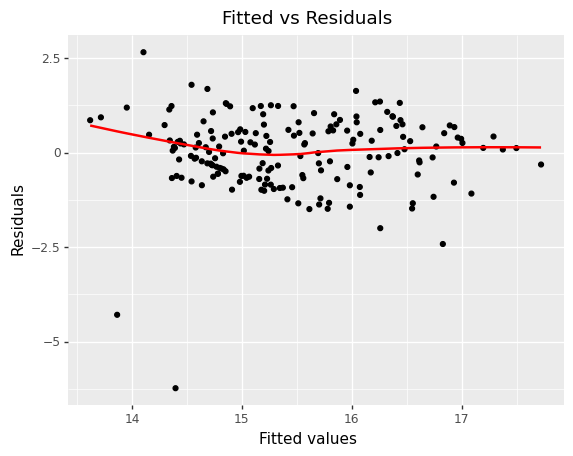

<ggplot: (8794466519745)>

In [84]:
(
    p9.ggplot(mapping = p9.aes(x = 'ols_res.fittedvalues', 
                                            y = "ols_res.resid_pearson"))
    + p9.geom_point()
    + p9.geom_smooth(color = "red")
    + p9.labs(title = "Fitted vs Residuals", x = 'Fitted values', y = 'Residuals')
)

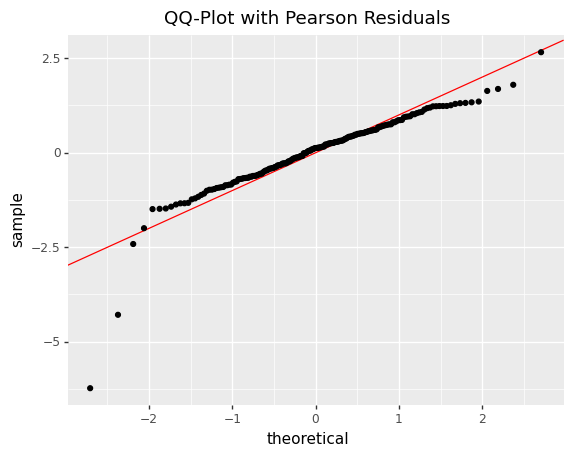

<ggplot: (8794490784823)>

In [85]:
(
    p9.ggplot(mapping = p9.aes(sample = "ols_res.resid_pearson"))
    + p9.geom_abline(p9.aes(intercept = 0, slope = 1), color = 'red')
    + p9.stats.stat_qq()
    + p9.labs(title = "QQ-Plot with Pearson Residuals")
)

### REMOVE OUTLIERS

In [86]:
df["Residuals"] = ols_res.resid_pearson
temp_df2 = df[round(df["Residuals"]) < -2]
temp_df2

,const,GP,MIN,PTS,DR,AST,FT%,2P%,SC-EFF,Salary,Residuals
107,1.0,17,5.9,4.1,1.6,0.1,51.3,65.8,1.842,19186.0,-4.287016
138,1.0,9,13.8,4.4,1.0,1.1,66.7,25.0,1.429,5318.0,-6.229335


In [87]:
df = df.drop(temp_df2.index)
df = df.drop("Residuals", axis = "columns")

In [88]:
ols = sm.OLS(np.log(df['Salary']),df.drop(columns = 'Salary')) 
ols_res = ols.fit() 
ols_res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     24.85
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           3.29e-25
Time:                        18:15:51   Log-Likelihood:                -199.52
No. Observations:                 182   AIC:                             417.0
Df Residuals:                     173   BIC:                             445.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4683      0.357     40.547      0.000      13.764      15.173
GP            -0.0153      0.012     -1.238      0.218      -0.040       0.009
MIN            0.0436      0.015      2.912      0.004       0.014       0.073
PTS            0.0296      0.016      1.820      0.070      -0.002       0.062
DR             0.1038      0.048      2.173      0.031       0.010       0.198
AST            0.0529      0.043      1.228      0.221      -0.032       0.138
FT%           -0.0003      0.003     -0.100      0.921      -0.007       0.006
2P%           -0.0097      0.006     -1.553      0.122      -0.022       0.003
SC-EFF         0.1953      0.322      0.606      0.545      -0.441       0.832
==============================================================================
Omnibus:                        2.183   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                2.221
Skew:                          -0.259   Prob(JB):                        0.329
Kurtosis:                       2.841   Cond. No.                         681.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/mattmori/anaconda3/lib/python3.9/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


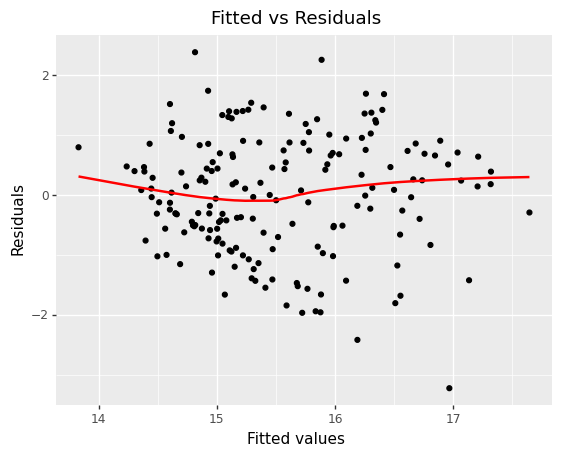

<ggplot: (8794466416764)>

In [89]:
(
    p9.ggplot(mapping = p9.aes(x = 'ols_res.fittedvalues', 
                                            y = "ols_res.resid_pearson"))
    + p9.geom_point()
    + p9.geom_smooth(color = "red")
    + p9.labs(title = "Fitted vs Residuals", x = 'Fitted values', y = 'Residuals')
)

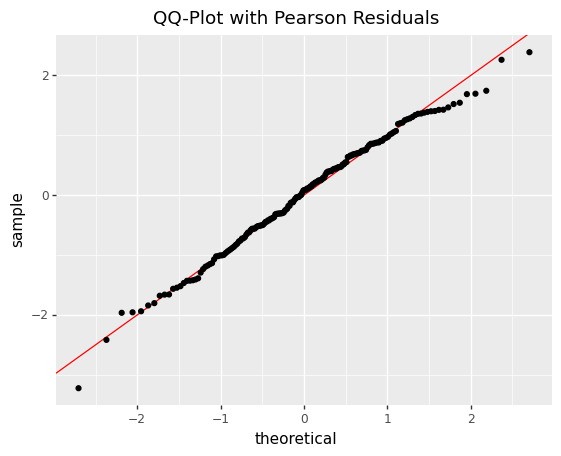

<ggplot: (8794466387972)>

In [90]:
(
    p9.ggplot(mapping = p9.aes(sample = "ols_res.resid_pearson"))
    + p9.geom_abline(p9.aes(intercept = 0, slope = 1), color = 'red')
    + p9.stats.stat_qq()
    + p9.labs(title = "QQ-Plot with Pearson Residuals")
)

### KINGS

In [91]:
kings_df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,De'Aaron Fox,21,21.0,31.7,23.1,0.5,4.6,5.1,5.8,1.1,0.5,2.6,2.5,2.2,8.6,16.6,51.6,1.9,5.0,38.1,4.1,5.0,81.9,6.7,11.6,57.4,1.393,0.57,"$28,103,550"
1,Domantas Sabonis,22,22.0,32.0,16.7,2.2,8.8,11.0,6.5,0.7,0.5,2.5,3.8,2.6,6.0,10.1,59.9,0.5,1.2,37.0,4.2,5.5,75.4,5.6,8.9,63.1,1.658,0.62,"$18,500,000"
2,Kevin Huerter,22,22.0,31.8,15.5,0.4,2.8,3.2,3.2,1.0,0.4,1.5,2.4,2.2,5.5,11.5,47.4,3.0,7.1,42.3,1.6,2.4,69.2,2.5,4.4,55.7,1.352,0.60,"$14,508,929"
3,Malik Monk,22,0.0,22.3,14.7,0.4,1.7,2.1,4.3,0.7,0.2,1.9,1.8,2.3,5.4,11.0,48.8,2.1,5.7,36.8,1.9,2.1,89.4,3.3,5.3,61.5,1.339,0.58,"$9,472,219"
4,Harrison Barnes,22,22.0,30.6,13.2,1.0,4.4,5.5,1.9,0.9,0.1,1.2,1.4,1.5,4.1,8.4,48.9,1.0,3.3,30.1,4.0,4.8,84.0,3.1,5.0,61.3,1.582,0.55,"$18,352,273"
5,Keegan Murray,20,18.0,28.4,11.3,0.9,3.2,4.1,0.9,0.8,0.6,1.6,2.1,0.6,4.1,9.9,41.4,1.9,5.7,33.3,1.2,1.4,85.2,2.2,4.2,52.4,1.136,0.51,"$8,008,440"
6,Terence Davis,20,1.0,13.2,7.0,0.5,2.6,3.0,1.5,0.8,0.2,0.8,1.8,2.0,2.5,5.6,43.8,1.4,3.6,39.4,0.7,0.8,87.5,1.1,2.1,51.2,1.250,0.56,"$4,000,000"
7,Davion Mitchell,22,1.0,19.2,6.7,0.1,1.3,1.4,2.3,0.5,0.2,1.0,1.6,2.2,2.7,6.0,44.7,0.8,2.7,30.5,0.5,0.7,73.3,1.9,3.3,56.2,1.114,0.52,"$4,833,600"
8,Trey Lyles,17,0.0,14.2,6.3,1.0,1.8,2.8,0.8,0.4,0.4,1.0,1.2,0.8,2.1,5.1,40.7,1.2,3.6,34.4,0.9,1.3,72.7,0.8,1.5,56.0,1.244,0.53,"$2,700,000"
9,Chimezie Metu,18,0.0,12.6,5.9,0.7,2.8,3.5,0.8,0.3,0.3,0.7,1.2,1.2,2.5,4.0,62.5,0.2,0.9,18.8,0.8,0.9,87.5,2.3,3.1,75.0,1.486,0.65,"$1,910,680"


In [92]:
#replace all the "--" and NAN to 0

kings_df['Salary'] = kings_df['Salary'].replace("--", '0')
kings_df['Salary'] = kings_df['Salary'].replace(np.NaN, '0')
#remove $ and , signals
for i in range(0,len(kings_df)):
    kings_df['Salary'][i] = kings_df['Salary'][i].lstrip('$')
    kings_df['Salary'][i] = kings_df['Salary'][i].replace(',','')
    #turn Salary to numbers
    kings_df['Salary'][i] = int(kings_df['Salary'][i])
#replace all 0 to NAN
kings_df['Salary'] = kings_df['Salary'].replace(0, np.NaN)
#drop all NAN
kings_df = kings_df.dropna()

/tmp/ipykernel_1012/1469477879.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_1012/1469477879.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_1012/1469477879.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [93]:
kings_names = kings_df["Name"]

In [94]:
kings_df = df_clean(kings_df)

In [95]:
kings_df = kings_df.drop("OR", axis = "columns")
kings_df = kings_df.drop("STL", axis = "columns")
kings_df = kings_df.drop("PF", axis = "columns")
kings_df = kings_df.drop("TO", axis = "columns")
kings_df = kings_df.drop("BLK", axis = "columns")
kings_df = kings_df.drop("FG%", axis = "columns")
kings_df = kings_df.drop("AST/TO", axis = "columns")
kings_df = kings_df.drop("SH-EFF", axis = "columns")
kings_df = kings_df.drop("GS", axis = "columns")
kings_df = kings_df.drop("REB", axis = "columns") 
kings_df = kings_df.drop("3P%", axis = "columns")

#kings_df = kings_df.drop("SC-EFF", axis = "columns")

In [96]:
kings_df = sm.add_constant(kings_df)
kings_df["GP"] = kings_df["GP"].astype("float64")


In [97]:
ols_res.predict(kings_df.drop(columns = 'Salary'))

0     16.686712
1     16.967117
2     16.139263
3     15.579662
4     16.101870
5     15.801431
6     15.013819
7     15.073276
8     14.919664
9     14.784731
10    14.602357
11    14.547625
13    14.650897
14    14.379015
dtype: float64

In [98]:
kings_df["Predicted"] = np.exp(ols_res.predict(kings_df.drop(columns = 'Salary')))
kings_df.insert(0,"Names",kings_names)
kings_df["Residuals"]= kings_df["Salary"]-kings_df["Predicted"]

In [99]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
kings_df

,Names,const,GP,MIN,PTS,DR,AST,FT%,2P%,SC-EFF,Salary,Predicted,Residuals
0,De'Aaron Fox,1.00000,21.00000,31.70000,23.10000,4.60000,5.80000,81.90000,57.40000,1.39300,28103550.00000,17658229.44069,10445320.55931
1,Domantas Sabonis,1.00000,22.00000,32.00000,16.70000,8.80000,6.50000,75.40000,63.10000,1.65800,18500000.00000,23373583.46401,-4873583.46401
2,Kevin Huerter,1.00000,22.00000,31.80000,15.50000,2.80000,3.20000,69.20000,55.70000,1.35200,14508929.00000,10213928.16758,4295000.83242
3,Malik Monk,1.00000,22.00000,22.30000,14.70000,1.70000,4.30000,89.40000,61.50000,1.33900,9472219.00000,5836617.89793,3635601.10207
4,Harrison Barnes,1.00000,22.00000,30.60000,13.20000,4.40000,1.90000,84.00000,61.30000,1.58200,18352273.00000,9839049.99669,8513223.00331
5,Keegan Murray,1.00000,20.00000,28.40000,11.30000,3.20000,0.90000,85.20000,52.40000,1.13600,8008440.00000,7285747.45062,722692.54938
6,Terence Davis,1.00000,20.00000,13.20000,7.00000,2.60000,1.50000,87.50000,51.20000,1.25000,4000000.00000,3314505.00955,685494.99045
7,Davion Mitchell,1.00000,22.00000,19.20000,6.70000,1.30000,2.30000,73.30000,56.20000,1.11400,4833600.00000,3517552.49886,1316047.50114
8,Trey Lyles,1.00000,17.00000,14.20000,6.30000,1.80000,0.80000,72.70000,56.00000,1.24400,2700000.00000,3016668.44076,-316668.44076
9,Chimezie Metu,1.00000,18.00000,12.60000,5.90000,2.80000,0.80000,87.50000,75.00000,1.48600,1910680.00000,2635887.79963,-725207.79963


In [100]:
kings_df["Residuals"].sum()

31211216.403139584

In [101]:
kings_df["Salary"] = np.log(kings_df["Salary"])
kings_df["Predicted"] =  np.log(kings_df["Predicted"])
kings_df["Residuals"]= kings_df["Salary"]-kings_df["Predicted"]
kings_df

,Names,const,GP,MIN,PTS,DR,AST,FT%,2P%,SC-EFF,Salary,Predicted,Residuals
0,De'Aaron Fox,1.00000,21.00000,31.70000,23.10000,4.60000,5.80000,81.90000,57.40000,1.39300,17.15141,16.68671,0.46469
1,Domantas Sabonis,1.00000,22.00000,32.00000,16.70000,8.80000,6.50000,75.40000,63.10000,1.65800,16.73328,16.96712,-0.23384
2,Kevin Huerter,1.00000,22.00000,31.80000,15.50000,2.80000,3.20000,69.20000,55.70000,1.35200,16.49027,16.13926,0.35101
3,Malik Monk,1.00000,22.00000,22.30000,14.70000,1.70000,4.30000,89.40000,61.50000,1.33900,16.06387,15.57966,0.48421
4,Harrison Barnes,1.00000,22.00000,30.60000,13.20000,4.40000,1.90000,84.00000,61.30000,1.58200,16.72526,16.10187,0.62339
5,Keegan Murray,1.00000,20.00000,28.40000,11.30000,3.20000,0.90000,85.20000,52.40000,1.13600,15.89601,15.80143,0.09458
6,Terence Davis,1.00000,20.00000,13.20000,7.00000,2.60000,1.50000,87.50000,51.20000,1.25000,15.20180,15.01382,0.18799
7,Davion Mitchell,1.00000,22.00000,19.20000,6.70000,1.30000,2.30000,73.30000,56.20000,1.11400,15.39110,15.07328,0.31783
8,Trey Lyles,1.00000,17.00000,14.20000,6.30000,1.80000,0.80000,72.70000,56.00000,1.24400,14.80876,14.91966,-0.11090
9,Chimezie Metu,1.00000,18.00000,12.60000,5.90000,2.80000,0.80000,87.50000,75.00000,1.48600,14.46297,14.78473,-0.32176


In [102]:
kings_df["Residuals"].sum()

2.5599728400206168